In [1]:
import pickle
from FlyOutput import FlyOutput
import Plotters
import plotly.graph_objects as go
import numpy as np  
import Utils
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from Evaluation import Evaluation
import time
import pandas as pd
from EvaluateAngleSweep import EvaluateAngleSweep
import matplotlib.cm as cm

%matplotlib qt

idx_iter = 0
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
input_path_for_image = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/'
path_output = 'D:/Documents/gaussian_model_output/'


model_names_left_wing = ['fly_phi_delta10_sweep_m40_40_left','fly_theta_delta10_sweep_m40_40_left','fly_psi_delta10_sweep_m40_40_left']
model_names_right_wing = ['fly_phi_delta10_sweep_m40_40','fly_psi_delta10_sweep_m40_40']
model_names_body = ['fly_yaw_delta10_sweep_m40_40','fly_pitch_delta10_sweep_m40_40','fly_roll_delta10_sweep_m40_40']

models = model_names_left_wing + model_names_right_wing + model_names_body


# models = ['fly_yaw_right_delta10_sweep_m40_40']

# model_name = 'fly_theta_delta10_sweep_m40_40'


angle_name = ['phi','theta','psi','phi','psi','yaw','pitch']
letedict = {'num_of_bins' : 20,'perc_wing_for_le' : 1, 'wing_length_snip':0.27}

frame = 1031

# models = ['fly_phi_delta10_sweep_m40_40_left']

with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)


with open(dict_path,'rb') as f:
    frames = pickle.load(f)
iterations = 1000

chamfer = {'wing':None ,'body':None}



angle_name = ['yaw','pitch','roll','phi_right','theta_right','psi_right','phi_left','theta_left','psi_left'] # phi_left  yaw pitch roll 
# angle_name = ['yaw'] # phi_left  yaw pitch roll 

model_name = [f'fly_{angle}_delta10_sweep_m40_40_try' for angle in angle_name]
model_name += ['fly_combo_delta10_sweep','fly_mesh_evaluation_elipse_bod_elipse_wing','fly_mesh_evaluation_elipse_bod_rec_wing','fly_right_wing_combo_delta10_5_sweep']
delta_angles = [np.array([  0., -30., -20., -10.,  10.,  20.,  30.])]*len(angle_name) + [np.array([  0., -10.,  10.])] + [np.array([  0.])] + [np.array([  0.])] + [np.array([  1., 2.,  3.,4,5,6,7])]
iterations_list = [iterations]*len(angle_name) + [iterations] + [1500] + [1500] + [1000]


model_name = ['initilize_with_loss_phi_psi_v3_full_run']
iterations_list = [1000]
delta_angles = [np.array([0,15])]

for delta_angle,model,iterations in zip(delta_angles,model_name,iterations_list):

    # for model_name in models:
    angle_name = model.split('_')[1]
    path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
    input_dir = f'{path_output}/{model}'
    sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
    sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
    file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
    sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)
    sweep_eval.delta_angles = delta_angle



    chamfer_2d_wing,chamfer_3d_wing,chamfer_3d_body,chamfer_2d_body = [],[],[],[]
    for mov_name in list(sweep_eval.sweep.keys()):    
        chamfer_2d_wing.append([frame.error_2d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
        chamfer_stats_2d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

        chamfer_3d_wing.append([frame.error_3d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
        chamfer_stats_3d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_3d_wing)

        chamfer_3d_body.append([frame.error_3d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
        chamfer_stats_3d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_3d_body)

        chamfer_2d_body.append([frame.error_2d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
        chamfer_stats_2d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_body)

    chamfer['wing'] = [np.vstack(chamfer_3d_wing),np.vstack(chamfer_2d_wing),chamfer_stats_3d_wing,chamfer_stats_2d_wing]
    chamfer['body'] = [np.vstack(chamfer_3d_body),np.vstack(chamfer_2d_body),chamfer_stats_3d_body,chamfer_stats_2d_body]

    Utils.pickle_file(chamfer,f'{input_dir}/chamfer.pkl')    


In [14]:
input_dir = f'{path_output}/{model}'

res_dir = os.listdir(f'{input_dir}/results') 
os.listdir(f'{input_dir}/results/{res_dir[0]}')

res_dir == 4617

len(os.listdir(f'{input_dir}/results/4617')) == len(delta_angles[0])

NameError: name 'model' is not defined

In [5]:
list(nominal_initial_angles.keys())[0].split('_')[3]

'1031'

In [17]:
res_dir

['1003',
 '1012',
 '1031',
 '1049',
 '1053',
 '1060',
 '1085',
 '1104',
 '1157',
 '1165',
 '1166',
 '1194',
 '1215',
 '1248',
 '1250',
 '1257',
 '1266',
 '1341',
 '1485',
 '1499',
 '1568',
 '1625',
 '1692',
 '1695',
 '1762',
 '1834',
 '1923',
 '1950',
 '1975',
 '2000',
 '2011',
 '2016',
 '2027',
 '2033',
 '2036',
 '2055',
 '2088',
 '2097',
 '2129',
 '2156',
 '2195',
 '2216',
 '223',
 '2237',
 '2245',
 '2346',
 '2347',
 '2366',
 '238',
 '2390',
 '252',
 '2532',
 '2553',
 '2565',
 '261',
 '2618',
 '2656',
 '2657',
 '2672',
 '2708',
 '271',
 '2774',
 '2783',
 '2870',
 '2872',
 '292',
 '2926',
 '2935',
 '2939',
 '296',
 '2961',
 '2979',
 '2984',
 '306',
 '3068',
 '3075',
 '3090',
 '3096',
 '3099',
 '3115',
 '3159',
 '3163',
 '318',
 '3186',
 '3190',
 '334',
 '344',
 '352',
 '3578',
 '3605',
 '3698',
 '3702',
 '3706',
 '3771',
 '384',
 '3893',
 '3903',
 '405',
 '413',
 '418',
 '4205',
 '4211',
 '4213',
 '4255',
 '4272',
 '436',
 '4373',
 '443',
 '4448',
 '4538',
 '4601',
 '4690',
 '4696',
 

In [ ]:
import os


res_dir = os.listdir(f'{input_dir}/results') 

results_dir = [res_dir for res_dir in res_dir if (len(os.listdir(f'{input_dir}/results/{res_dir}')) == len(delta_angles[0]))]
results_dir


res = [mov_name for mov_name in nominal_initial_angles.keys() if mov_name.split('_')[3] in results_dir]

['mov_36_frame_1031',
 'mov_36_frame_352',
 'mov_45_frame_443',
 'mov_36_frame_271',
 'mov_45_frame_492',
 'mov_36_frame_865',
 'mov_36_frame_223',
 'mov_36_frame_261',
 'mov_36_frame_1049',
 'mov_36_frame_482',
 'mov_36_frame_1053',
 'mov_36_frame_981',
 'mov_45_frame_252',
 'mov_36_frame_238',
 'mov_128_frame_977',
 'mov_128_frame_890',
 'mov_128_frame_983',
 'mov_36_frame_1166',
 'mov_128_frame_960',
 'mov_128_frame_834',
 'mov_128_frame_757',
 'mov_128_frame_483',
 'mov_128_frame_839',
 'mov_128_frame_1104',
 'mov_128_frame_1692',
 'mov_128_frame_863',
 'mov_128_frame_854',
 'mov_94_frame_1341',
 'mov_134_frame_943',
 'mov_134_frame_958',
 'mov_132_frame_384',
 'mov_76_frame_2055',
 'mov_134_frame_1250',
 'mov_134_frame_1215',
 'mov_134_frame_969',
 'mov_132_frame_418',
 'mov_134_frame_1257',
 'mov_134_frame_1060',
 'mov_132_frame_436',
 'mov_76_frame_4272',
 'mov_164_frame_2346',
 'mov_76_frame_3605',
 'mov_76_frame_4211',
 'mov_76_frame_2926',
 'mov_76_frame_2347',
 'mov_164_fram

In [1]:
import pickle
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)


In [2]:
nominal_initial_angles['mov_70_frame_4617']

{'body_angles': [75.0, -40.0, -3.0],
 'left_wing_angles': [24.0, 330.82788, 8.0],
 'right_wing_angles': [-11.0, -28.417137, -12.0],
 'right_wing_angle_joint1': 0.0,
 'left_wing_angle_joint1': -0.0,
 'right_wing_angle_joint2': 0.0,
 'left_wing_angle_joint2': -0.0,
 'right_wing_twist_joint1': 0.0,
 'left_wing_twist_joint1': -0.0,
 'right_wing_twist_joint2': 0.0,
 'left_wing_twist_joint2': -0.0}

In [ ]:

idx = 0
with open(f'D:/Documents/gaussian_model_output/initilize_with_loss_yaw_phi_v3/angles_op_from_loss.pkl', 'rb') as handle:
    phi_yaw_angles = pickle.load(handle)


In [ ]:
    
body_run_frames = { key:val for key,val in zip(nominal_initial_angles.keys(),phi_yaw_angles) if int(key.split('_')[3]) in phi_yaw_angles[:,-1]}
nominal_frames = { key:val for key,val in nominal_initial_angles.items() if key not in body_run_frames.keys()}


In [25]:
len(list(nominal_frames.keys()))

150

In [26]:
[key for key in nominal_frames.keys() if key not in body_run_frames.keys()]

['mov_59_frame_1246']

(array([ 6.,  6., 12., 17., 26., 17., 27., 21., 12.,  7.]),
 array([-29. , -25.7, -22.4, -19.1, -15.8, -12.5,  -9.2,  -5.9,  -2.6,
          0.7,   4. ]),
 <BarContainer object of 10 artists>)

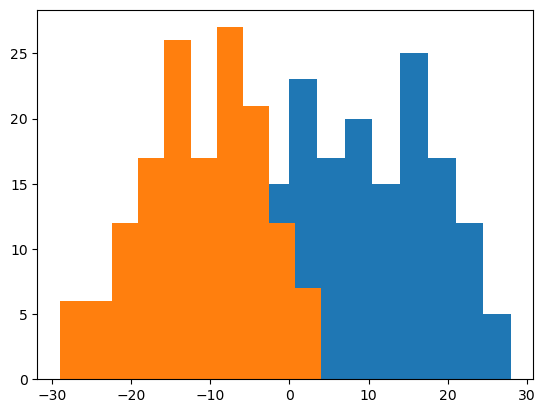

In [15]:
import numpy as np
import matplotlib.pyplot as plt
lw = np.vstack([nominal_initial_angles[key]['left_wing_angles'] for key in nominal_initial_angles.keys()])
rw = np.vstack([nominal_initial_angles[key]['right_wing_angles'] for key in nominal_initial_angles.keys()])


plt.hist(lw[:,2])
plt.hist(rw[:,2])

In [22]:
import itertools
phi_grid = np.hstack((np.arange(-90.0,0,10),np.arange(0.0,90,10)))
theta_grid = 0#np.hstack((np.arange(-30.0,0,15),np.arange(0.0,45,15)))
psi_grid = np.hstack((np.arange(-170.0,10,10)))
roll_yaw = list(itertools.product(phi_grid,psi_grid))
len(roll_yaw)

324

In [7]:
# histogram of chamfer distance for each point

fig,ax = plt.subplots(1,2)
angle_idx = 2
ax[0].hist(np.hstack([np.hstack((sweep_eval.sweep[mov_name][angle_idx].error_3d_le[0],sweep_eval.sweep[mov_name][angle_idx].error_3d_le[1]))*1000 for mov_name in sweep_eval.sweep.keys()]),bins = 100)
ax[1].hist(np.hstack([np.hstack((sweep_eval.sweep[mov_name][angle_idx].error_3d_le[2],sweep_eval.sweep[mov_name][angle_idx].error_3d_le[3]))*1000 for mov_name in sweep_eval.sweep.keys()]),bins = 100)


IndexError: list index out of range

In [ ]:
# plot subplot of th and box 6 subplot - wings================================================

path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
# plot box plot of both wings


plt.rcParams.update({
    'font.size': 20,           # Base font size
    'axes.titlesize': 20,      # Axes title
    'axes.labelsize': 14,      # X and Y labels
    'xtick.labelsize': 18,     # Tick labels
    'ytick.labelsize': 18,
    'legend.fontsize': 12,
    'figure.titlesize': 18     # Figure suptitle
})


plot_body_wing = 'wing'
yticks = np.arange(0,1200,200)
yminmax = [min(yticks),max(yticks)]
fig2,ax2 = plt.subplots(2,3,figsize=(18, 10))
chamfer_stats_th = Plotters.wing_subplot_box(delta_angles[0],path_output,plot_body_wing,angle_name, ax2[0],yticks,whis = (10,90))
Plotters.body_subplot_box(delta_angles[0],path_output,plot_body_wing,angle_name, ax2[1],yticks = np.arange(0,1200,200))

fig2.tight_layout()
fig2.savefig(f'{path_figures}chamfer_3d_boxplot_{plot_body_wing}', transparent=True, dpi=300, format='svg', bbox_inches='tight')


fig,ax = plt.subplots(2,3,figsize=(18, 10))
num_lines = 7
colors = cm.turbo(np.linspace(0.3, 1, num_lines))  # Adjust 0.3 to 1 for visible gradient
chamfer_stats_th = Plotters.wing_subplot_th(path_output,plot_body_wing,ax[0],colors)
chamfer_stats_th_body = Plotters.body_subplot_th(path_output,plot_body_wing,ax[1],colors)
fig.tight_layout()
fig.savefig(f'{path_figures}chamfer_3d_frames_th_{plot_body_wing}', transparent=True, dpi=300, format='svg', bbox_inches='tight')







In [454]:
def get_cd_for_perd_for_ang(percent,angle,chamfer_stats_th, angle_of_analysis):
    th = np.arange(0.01*1000,0.3*1000,5)
    angle_vec = np.array([-30,-20,-10,0,10,20,30])
    angle_idx = np.argwhere(angle_vec == angle).flatten()
    if len(angle_idx) > 0:
        cd_th = chamfer_stats_th[angle_of_analysis][:,angle_idx[0]].flatten()
        idx_gt_90 = np.argwhere(cd_th > percent)
        return th[idx_gt_90[0]] if len(idx_gt_90) > 0 else None
    else:
        return None

angle_of_analysis = 'yaw'
percent = 90 # percent of frames that above th
[get_cd_for_perd_for_ang(percent,angle,chamfer_stats_th_body, angle_of_analysis) for angle in np.array([-30,-20,-10,0,10,20,30])]

[None, None, array([160.]), array([160.]), array([150.]), array([165.]), None]

In [437]:
plt.figure(),plt.plot(chamfer['wing'][1],chamfer['wing'][0])

(<Figure size 640x480 with 1 Axes>,
  <matplotlib.lines.Line2D at 0x21eec5af490>])

In [459]:
# plot subplot of th and box 3 subplot - body ================================================

path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
# plot box plot of both wings


plt.rcParams.update({
    'font.size': 20,           # Base font size
    'axes.titlesize': 20,      # Axes title
    'axes.labelsize': 14,      # X and Y labels
    'xtick.labelsize': 18,     # Tick labels
    'ytick.labelsize': 18,
    'legend.fontsize': 12,
    'figure.titlesize': 18     # Figure suptitle
})


plot_body_wing = 'body'
yticks = np.arange(0,200,50)
yminmax = [min(yticks),max(yticks)]
fig2,ax2 = plt.subplots(1,3,figsize=(18, 5))
Plotters.body_subplot_box(delta_angles[0],path_output,plot_body_wing,angle_name, ax2,yticks,whis = (10,90))

fig2.tight_layout()
fig2.savefig(f'{path_figures}chamfer_3d_boxplot_{plot_body_wing}', transparent=True, dpi=300, format='svg', bbox_inches='tight')



fig,ax = plt.subplots(1,3,figsize=(18, 5))
num_lines = 7
colors = cm.turbo(np.linspace(0.3, 1, num_lines))  # Adjust 0.3 to 1 for visible gradient
chamfer_stats_th_body = Plotters.body_subplot_th(path_output,plot_body_wing,ax,colors)
fig.tight_layout()
fig.savefig(f'{path_figures}chamfer_3d_frames_th_{plot_body_wing}', transparent=True, dpi=300, format='svg', bbox_inches='tight')






In [461]:
def get_cd_for_perd_for_ang(percent,angle,chamfer_stats_th, angle_of_analysis):
    th = np.arange(0.01*1000,0.3*1000,5)
    angle_vec = np.array([-30,-20,-10,0,10,20,30])
    angle_idx = np.argwhere(angle_vec == angle).flatten()
    if len(angle_idx) > 0:
        cd_th = chamfer_stats_th[angle_of_analysis][:,angle_idx[0]].flatten()
        idx_gt_90 = np.argwhere(cd_th > percent)
        return th[idx_gt_90[0]] if len(idx_gt_90) > 0 else None
    else:
        return None

angle_of_analysis = 'pitch'
percent = 90 # percent of frames that above th
[get_cd_for_perd_for_ang(percent,angle,chamfer_stats_th_body, angle_of_analysis) for angle in np.array([-30,-20,-10,0,10,20,30])]

[array([135.]),
 array([115.]),
 array([100.]),
 array([95.]),
 array([90.]),
 array([90.]),
 array([90.])]

In [ ]:
angle_to_find = 'pitch'
th = np.arange(0.01*1000,0.3*1000,5)
angle = 0
angle_vec = np.array([-30,-20,-10,0,10,20,30])
angle_idx = np.argwhere(angle_vec == angle)
percent = 90

cd_th = chamfer_stats_th_body['yaw'][:,angle_idx].flatten()
idx_gt_90 = np.argwhere(cd_th > percent)[0]
th_gt_90 = th[idx_gt_90]



def get_cd_for_perd_for_ang(percent,angle,chamfer_stats_th, angle_of_analysis):
    th = np.arange(0.01*1000,0.3*1000,5)
    angle_vec = np.array([-30,-20,-10,0,10,20,30])
    angle_idx = np.argwhere(angle_vec == angle)

    cd_th = chamfer_stats_th[angle_of_analysis][:,angle_idx].flatten()
    idx_gt_90 = np.argwhere(cd_th > percent)[0]
    return th[idx_gt_90]

th_gt_90

array([95.])

90.0

In [21]:
plt.hist([sweep_eval.sweep[eval][0].error_3d_chamfer_body for eval in sweep_eval.sweep.keys()])

(array([ 8., 12., 18., 17., 17.,  6., 11.,  6.,  0.,  2.]),
 array([182.97075756, 190.6654556 , 198.36015364, 206.05485167,
        213.74954971, 221.44424774, 229.13894578, 236.83364381,
        244.52834185, 252.22303989, 259.91773792]),
 <BarContainer object of 10 artists>)

In [10]:
sweep_eval.sweep['mov_128_frame_1104'][0].error_2d_chamfer_wing

2.6764614823871486

In [324]:
# width of wings ==========================================================================

iterations = 1000
model = f'fly_yaw_delta10_sweep_m40_40_try'

path_hull = 'D:/Documents/gaussian_model_output/hull_evaluation'
angle_name = model.split('_')[1]
path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'
sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)


sweep_eval.load_hull_for_wing_width(path_hull)

sweep_eval.find_wings_from_hull('right')
sweep_eval.find_wings_from_hull('left')

hull_wings_project_z = [1000*sweep_eval.devide_wing_project_z(mov_name)[0] for mov_name in sweep_eval.wing_hull['right'].keys()]
model_wings_project_z = [1000*sweep_eval.devide_wing_project_z(mov_name)[1] for mov_name in sweep_eval.wing_hull['right'].keys()]


100%|██████████| 132/132 [00:08<00:00, 14.76it/s]


In [478]:
# width of wings plot ==========================================================================

plt.rcParams.update({
    'font.size': 20,           # Base font size
    'axes.titlesize': 14,      # Axes title
    'axes.labelsize': 14,      # X and Y labels
    'xtick.labelsize': 18,     # Tick labels
    'ytick.labelsize': 18,
    'legend.fontsize': 14,
    'figure.titlesize': 18     # Figure suptitle
})
plt.hist(model_wings_project_z, alpha = 0.5, bins = 30, label = 'Model')
plt.hist(hull_wings_project_z, alpha = 0.5, bins = 30,label ='Hull')
plt.xlabel('Wing width [$\mu$m]')
plt.ylabel('# of frames')
plt.legend(title = 'Initilization',title_fontsize='small' )

plt.tight_layout()
plt.show()
plt.savefig(f'{path_figures}hull_compare_width_wing.svg', transparent=True, dpi=300, format='svg', bbox_inches='tight')

print(f'hull : {np.mean(hull_wings_project_z)}, model {np.mean(model_wings_project_z)}')


hull : 31.462904228827306, model 21.59602143099896


In [9]:
import itertools

# chamfer distance for combo angles ==========================================================================
path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
file_save_name = f'chamfer_3d_10_5.svg'
model = f'fly_right_wing_combo_delta10_5_sweep'


angle_name = model.split('_')[1]
path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'
sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)
yticks = (0,200)

fig,ax = plt.subplots(1,1, figsize = (10,4))
wakk =[(0,0,0)]

yaw_grid = np.hstack(np.arange(5.0,15,5))
roll_grid = np.hstack(np.arange(5.0,15,5))
pitch_grid = np.hstack(np.arange(5.0,15,5))

roll_yaw = list(itertools.product(yaw_grid,pitch_grid,roll_grid))[1:-1]
delta_angles = wakk + roll_yaw
delta_angles = [str(delta_angles) for delta_angles in delta_angles]

angles = np.vstack([wing['right_wing_angles'] for wing in sweep_eval.ini_angles.values()])
delta_angles = [str((angle - angles[0]).astype(np.int16)) for angle in angles]


chamfer_df = sweep_eval.generate_dflong_chamfer(delta_angles,model) 

Plotters.boxplot_v2(chamfer_df, delta_angles, 'xtick', ax, showfliers=False,cmap_name = 'Reds',whis = (0,90))
ax.set_xlabel('')
ax.set_ylabel('CD [µm]')
ax.set_title('$[\\phi , \\psi , \\theta]$')
ax.set_yticks(yticks)
plt.tight_layout()
plt.tight_layout()

fig.savefig(f'{path_figures}{file_save_name}', transparent=True, dpi=300, format='svg', bbox_inches='tight')

filtered_90th = chamfer_df[chamfer_df['xtick'] == delta_angles[-1]]['chamfer_dist'].quantile(0.9)
filtered_90th

187.9437815169408

In [3]:
# chamfer distance for combo angles ==========================================================================
path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
file_save_name = f'chamfer_3d_combination_yaw_roll_10_pitch_m10_10.svg'
model = f'fly_combo_delta10_sweep'
fig,ax = plt.subplots(1,1, figsize = (10,4))
delta_angles = ['$[0,0,0] ^\circ$','$[10,-10,10]^\circ$','$[10,10,10]^\circ$']
yticks = (0,200)
angle_name = model.split('_')[1]
path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'
sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)


chamfer_df = sweep_eval.generate_dflong_chamfer(delta_angles,model) 

Plotters.boxplot_v2(chamfer_df, delta_angles, 'xtick', ax, showfliers=False,cmap_name = 'Greens', whis = (0,90))
ax.set_xlabel('')
ax.set_ylabel('CD [µm]')
ax.set_title('[Yaw, Pitch, Roll]')
ax.set_yticks(yticks)

plt.tight_layout()

plt.tight_layout()

fig.savefig(f'{path_figures}{file_save_name}', transparent=True, dpi=300, format='svg', bbox_inches='tight')

filtered_90th = chamfer_df[chamfer_df['xtick'] == delta_angles[2]]['chamfer_dist'].quantile(0.9)
filtered_90th

162.32618036527592

In [4]:
# chamfer distance for pipeline ==========================================================================
path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
file_save_name = f'pipeline.svg'
model = f'initilize_with_loss_phi_psi_v3_full_run'
fig,ax = plt.subplots(1,1, figsize = (10,4))
delta_angles = ['Nominal','Wing from Ppipeline']
yticks = (0,200)
angle_name = model.split('_')[1]
path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'
sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)



chamfer_df = sweep_eval.generate_dflong_chamfer(delta_angles,model) 

Plotters.boxplot_v2(chamfer_df, delta_angles, 'xtick', ax, showfliers=False,cmap_name = 'Greens', whis = (0,90))
ax.set_xlabel('')
ax.set_ylabel('CD [µm]')
# ax.set_title('[Yaw, Pitch, Roll]')
ax.set_yticks(yticks)

plt.tight_layout()

plt.tight_layout()

fig.savefig(f'{path_figures}{file_save_name}', transparent=True, dpi=300, format='svg', bbox_inches='tight')

filtered_90th = chamfer_df[chamfer_df['xtick'] == delta_angles[2]]['chamfer_dist'].quantile(0.9)
filtered_90th

IndexError: list index out of range

In [4]:

# chamfer distance for different mesh ==========================================================================
path_figures = 'G:/My Drive/Research/gaussian_splatting/article/plots/evaluation/'
file_save_name_wing = f'different_mesh_wing.svg'
yticks = (75,200)

fig,ax = plt.subplots(1,1, figsize =(10,6))
plot_body_wing = 'wing'
models = ['fly_combo_delta10_sweep','fly_mesh_evaluation_elipse_bod_elipse_wing','fly_mesh_evaluation_elipse_bod_rec_wing']
xname = ['Nominal','Ellipse wings','Rectangle wings']
chamfer_df = []

chamfer_df_wing = pd.concat([sweep_eval.load_1d_chamfer_nominal_to_df(name,model) for model,name in zip(models,xname)], axis=0)
Plotters.boxplot_v2(chamfer_df_wing, xname, 'xtick', ax, showfliers=False,cmap_name = 'Reds')


ax.set_xlabel('')
ax.set_title('Wings')
ax.set_ylabel('CD [µm]')
ax.set_yticks(yticks)
fig.savefig(f'{path_figures}{file_save_name_wing}', transparent=True, dpi=300, format='svg', bbox_inches='tight')


yticks = (75,100)

file_save_name_body = f'different_mesh_body.svg'

fig,ax = plt.subplots(1,1, figsize =(10,6))
chamfer_df_body = pd.concat([sweep_eval.load_1d_chamfer_nominal_to_df(name,model,plot_body_wing = 'body') for model,name in zip(models,xname)], axis=0)
Plotters.boxplot_v2(chamfer_df_body, xname, 'xtick', ax, showfliers=False,cmap_name = 'Greens')
ax.set_xlabel('')
ax.set_title('Body')
ax.set_ylabel('CD [µm]')

# ax[1].set_title('Body')
ax.set_yticks(yticks)

# ax[1].set
# _yticks(yticks)

plt.tight_layout()




fig.savefig(f'{path_figures}{file_save_name_body}', transparent=True, dpi=300, format='svg', bbox_inches='tight')


filtered_90th = chamfer_df_wing[chamfer_df_wing['xtick'] == xname[1]]['chamfer_dist'].quantile(0.9)
filtered_90th

168.09757182678146

In [67]:
filtered_90th = chamfer_df_body[chamfer_df_body['xtick'] == xname[2]]['chamfer_dist'].quantile(0.9)
filtered_90th

92.42017248932731

In [92]:
path_output

'D:/Documents/gaussian_model_output/'

In [37]:
import plotly.graph_objects as go
import numpy as np
# ['limegreen','crimson','magenta','magenta','blue','black','black']

color_list = ['limegreen','crimson','magenta','magenta','dodgerblue','blue','blue','black','black','black','black','red','red','red','red','red','red','red','red']

name_list = ['body','right wing','right wing le','right wing te','left wing','left wing le','left wing te',
             'left_wing_tagged_le','left_wing_tagged_te','right_wing_tagged_le','right_wing_tagged_te','bound_on_interest_rw_te',
             'bound_on_interest_rw_le','interest_on_bound_rw_le','interest_on_bound_rw_te']

name_list = ['body','right wing','right wing le','right wing te','left wing','left wing le','left wing te',
             'left_wing_tagged_le','left_wing_tagged_te','right_wing_tagged_le','right_wing_tagged_te']

# name_list = ['xyz_rotated']

size_list = [3,3,4,4,3,4,4,4,4,5,5,5,5,5,5,5]
framestart = 1031
frame_end = 1032
frames = [int(mov_name.split('_')[3]) for mov_name in sweep_eval.sweep.keys()]
model = f'initilize_with_loss_phi_psi_v3_full_run'
iterations = 1000
delta_angle = np.array([0, -10.0,10.0])
output_path = f'{path_output}/{model}/animated_plot_{iterations}.html'
idx_angle = 1

# === HELPERS ===

def create_scatter3d(xyz, color,name,size = 2):
    """Create a single 3D scatter trace for a specific part."""
    return go.Scatter3d(
        x=xyz[:, 0],
        y=xyz[:, 1],
        z=xyz[:, 2],
        mode="markers",
        name = name,
        marker=dict(size=size, opacity=1, color=color, colorscale='gray'),
    )


def get_global_bounds(xyz_list):
    """Compute global min and max coordinates over all frames for consistent axis scaling."""
    return np.min(xyz_list, axis=0), np.max(xyz_list, axis=0)


def create_frame(parts_list, color_list,size_list, frame_name,name_list):
    """Create one animation frame with all parts for a given timestep."""
    data = [
        create_scatter3d(part, color,name,size)
        for part, color,size,name in zip(parts_list, color_list, size_list,name_list)
    ]
    return go.Frame(data=data, name=frame_name)


def create_play_pause_buttons():
    """Return Play/Pause button definitions for animation."""
    return [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate",
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate",
                },
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
        }
    ]

def create_slider(frame_nums):
    """Create a slider using actual frame numbers."""
    return [
        {
            "active": 0,
            "steps": [
                {
                    "args": [[str(i)], {"frame": {"duration": 100, "redraw": True}, "mode": "immediate"}],
                    "label": str(frame_num),
                    "method": "animate",
                }
                for i, frame_num in enumerate(frame_nums)
            ],
        }
    ]


# === MAIN FUNCTION ===

def create_3d_animation(frames_list, color_list,xyz_all_frames,size_list,name_list):
    """Build and show the 3D animation."""
    # frame_nums = [f.frame_num for f in frames_list[framestart - frame0:frame_end - frame0]]
    frame_nums = [frame.frame_num for frame in frames_list if frame != 'Fail']
    min_xyz, max_xyz = get_global_bounds(xyz_all_frames)

    # Initial frame data
    intial_parts = [frames_list[0].body,frames_list[0].right_wing,frames_list[0].right_wing_boundary_le,frames_list[0].right_wing_boundary_te,
                    frames_list[0].left_wing,frames_list[0].left_wing_boundary_le,
                    frames_list[0].left_wing_boundary_te,
                      frames_list[0].left_wing_tagged_le, frames_list[0].left_wing_tagged_te,
                      frames_list[0].right_wing_tagged_le, frames_list[0].right_wing_tagged_te,
                    frames_list[0].bound_on_interest_rw_te, frames_list[0].bound_on_interest_rw_le,
                    frames_list[0].interest_on_bound_rw_le, frames_list[0].interest_on_bound_rw_te]
    # intial_parts = [frames_list[0].xyz_rotated,]
    initial_data = [
        create_scatter3d(part, color,name,size)
        for  part,color,size,name in zip(intial_parts, color_list,size_list,name_list)
    ]
    bounding_box_trace = go.Scatter3d(

    mode='markers',
    marker=dict(size=0.1, color='rgba(0,0,0,0)'),
    showlegend=False
    )
    initial_data.append(bounding_box_trace)
    # Create frames for animation
    frames_data = [
        create_frame([xyz_frame.body,xyz_frame.right_wing,xyz_frame.right_wing_boundary_te,xyz_frame.right_wing_boundary_le,xyz_frame.left_wing,
                      xyz_frame.left_wing_boundary_te,xyz_frame.left_wing_boundary_le,
                        xyz_frame.left_wing_tagged_le, xyz_frame.left_wing_tagged_te,
                        xyz_frame.right_wing_tagged_le, xyz_frame.right_wing_tagged_te,
                        xyz_frame.bound_on_interest_rw_te, xyz_frame.bound_on_interest_rw_le,
                        xyz_frame.interest_on_bound_rw_le, xyz_frame.interest_on_bound_rw_te], color_list,size_list, str(i),name_list)
        for i, xyz_frame in enumerate(frames_list) if xyz_frame != 'Fail'
    ]

    # interest_on_bound_lw_te
    # bound_on_interest_lw_le

    # frames_data = [
    #     create_frame([xyz_frame.xyz_rotated], color_list,size_list, str(i),name_list)
    #     for i, xyz_frame in enumerate(frames_list)
    # ]

    # Build full figure
    fig = go.Figure(
        data=initial_data,
        layout=go.Layout(
            scene=dict(
                xaxis_title="X",
                yaxis_title="Y",
                zaxis_title="Z",
            ),
            updatemenus=create_play_pause_buttons(),
            sliders=create_slider(frame_nums),
        ),
        frames=frames_data,
    )


    fig.update_layout(
scene=dict(
    xaxis=dict(
        visible=False,
        showgrid=False,
        showticklabels=False,
        showline=False,
        zeroline=False
    ),
    yaxis=dict(
        visible=False,
        showgrid=False,
        showticklabels=False,
        showline=False,
        zeroline=False
    ),
    zaxis=dict(
        visible=False,
        showgrid=False,
        showticklabels=False,
        showline=False,
        zeroline=False
    ),
    bgcolor='white',
    aspectmode='data',
)
)



    fig.show()
    fig.write_html(output_path)
    print(f"Saved animation to: {output_path}")





# path_hull = 'D:/Documents/gaussian_model_output/hull_evaluation'
# angle_name = model.split('_')[1]
# path_frame = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
# input_dir = f'{path_output}/{model}'
# sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model,delta_angles=delta_angle)
# sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
# file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
# sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)

utput_path = f'{path_output}/{model}/animated_plot.html'

frame_list = [sweep_eval.sweep[mov_name][idx_angle] for mov_name in sweep_eval.sweep.keys()]
# frame_list = list(hull_to_compare.values())
xyz_all_frames = np.vstack([frame.xyz_rotated for frame in frame_list if frame != 'Fail'])
create_3d_animation(frame_list, color_list,xyz_all_frames,size_list,name_list)




# point_3d_per_frame.append(np.vstack(points_3d))
# gaussians_interest_points.append(gaussian_points)

Saved animation to: D:/Documents/gaussian_model_output//initilize_with_loss_phi_psi_v3_full_run/animated_plot_1000.html


In [13]:
len(sweep_eval.sweep)

148

In [8]:
# open combo angles==================================================================================================
import pickle
from FlyOutput import FlyOutput
import Plotters
import plotly.graph_objects as go
import numpy as np  
import Utils
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from Evaluation import Evaluation
import time
import pandas as pd
from EvaluateAngleSweep import EvaluateAngleSweep
%matplotlib qt

idx_iter = 0
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
input_path_for_image = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/'
path_output = 'D:/Documents/gaussian_model_output/'


letedict = {'num_of_bins' : 20,'perc_wing_for_le' : 1, 'wing_length_snip':0.27}

frame = 1031

# models = ['fly_phi_delta10_sweep_m40_40_left']

with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)


with open(dict_path,'rb') as f:
    frames = pickle.load(f)
iterations = 1

chamfer = {'wing':None ,'body':None}


models = [f'fly_combo_delta10_sweep']

for model_name in models:
    angle_name = model_name.split('_')[1]
    path_frame = f'D:/Documents/gaussian_model_output/{model_name}/{frame}/initial/'
    input_dir = f'{path_output}/{model_name}'
    sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model_name,delta_angles = np.array([  0,-10,  10.0]))
    sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
    file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
    sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)
    sweep_eval.delta_angles = np.array([0,-10, 10.0])



chamfer_2d_wing,chamfer_3d_wing,chamfer_3d_body,chamfer_2d_body = [],[],[],[]
for mov_name in list(sweep_eval.sweep.keys()):    
    chamfer_2d_wing.append([frame.error_2d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_2d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_3d_wing.append([frame.error_3d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_3d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_3d_body.append([frame.error_3d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_3d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_2d_body.append([frame.error_2d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_2d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

chamfer['wing'] = [np.vstack(chamfer_3d_wing),np.vstack(chamfer_2d_wing),chamfer_stats_3d_wing,chamfer_stats_2d_wing]
chamfer['body'] = [np.vstack(chamfer_3d_body),np.vstack(chamfer_2d_body),chamfer_stats_3d_body,chamfer_stats_2d_body]

Utils.pickle_file(chamfer,f'{input_dir}/chamfer.pkl')    


100%|██████████| 151/151 [00:29<00:00,  5.10it/s]


frames saved: D:/Documents/gaussian_model_output//fly_combo_delta10_sweep/frames_combo_sweep_iteration_1.pkl


In [ ]:
sweep_eval.sweep['mov_121_frame_2000']

{'mov_36_frame_1031': [<Evaluation.Evaluation at 0x20be945de40>,
 'mov_36_frame_352': [<Evaluation.Evaluation at 0x20bf1d125c0>,
 'mov_45_frame_443': [<Evaluation.Evaluation at 0x20bf1d117b0>,
 'mov_36_frame_271': [<Evaluation.Evaluation at 0x20bf1e4d930>,
 'mov_45_frame_492': [<Evaluation.Evaluation at 0x20bf1e4c2e0>,
 'mov_36_frame_865': [<Evaluation.Evaluation at 0x20bf1e4da50>,
 'mov_36_frame_223': [<Evaluation.Evaluation at 0x20bffe08b50>,
 'mov_36_frame_261': [<Evaluation.Evaluation at 0x20b91d8e980>,
 'mov_36_frame_1049': [<Evaluation.Evaluation at 0x20bf2e82770>,
 'mov_36_frame_482': [<Evaluation.Evaluation at 0x20bf2eee290>,
 'mov_36_frame_1053': [<Evaluation.Evaluation at 0x20bf2f06bf0>,
 'mov_36_frame_981': [<Evaluation.Evaluation at 0x20bf2f0b550>,
 'mov_45_frame_252': [<Evaluation.Evaluation at 0x20bf2f23be0>,
 'mov_36_frame_238': [<Evaluation.Evaluation at 0x20bf4fd0580>,
 'mov_128_frame_977': [<Evaluation.Evaluation at 0x20bf4fccee0>,
 'mov_128_frame_890': [<Evaluation.E

In [5]:
list(nominal_initial_angles.keys())

['mov_36_frame_1031',
 'mov_36_frame_352',
 'mov_45_frame_443',
 'mov_36_frame_271',
 'mov_45_frame_492',
 'mov_36_frame_865',
 'mov_36_frame_223',
 'mov_36_frame_261',
 'mov_36_frame_1049',
 'mov_36_frame_482',
 'mov_36_frame_1053',
 'mov_36_frame_981',
 'mov_45_frame_252',
 'mov_36_frame_238',
 'mov_128_frame_977',
 'mov_128_frame_890',
 'mov_128_frame_983',
 'mov_36_frame_1166',
 'mov_128_frame_960',
 'mov_128_frame_834',
 'mov_128_frame_757',
 'mov_128_frame_483',
 'mov_128_frame_839',
 'mov_128_frame_1104',
 'mov_128_frame_1692',
 'mov_128_frame_863',
 'mov_128_frame_854',
 'mov_94_frame_1341',
 'mov_134_frame_943',
 'mov_134_frame_958',
 'mov_132_frame_384',
 'mov_76_frame_2055',
 'mov_134_frame_1250',
 'mov_134_frame_1215',
 'mov_134_frame_969',
 'mov_132_frame_418',
 'mov_134_frame_1257',
 'mov_134_frame_1060',
 'mov_132_frame_436',
 'mov_76_frame_4272',
 'mov_164_frame_2346',
 'mov_76_frame_3605',
 'mov_76_frame_4211',
 'mov_76_frame_2926',
 'mov_76_frame_2347',
 'mov_164_fram

In [31]:
import itertools



yaw_grid = np.hstack((np.arange(-180.0,0,7),np.arange(10.0,180,7)))
roll_grid = np.hstack((np.arange(-20.0,0,10),np.arange(10.0,20,10)))

pitch_grid =np.hstack((np.arange(-60.0,0,15),np.arange(15.0,30,15)))


phi_grid = np.hstack((np.arange(-90.0,0,10),np.arange(0.0,90,10)))
theta_grid = np.hstack((np.arange(-30.0,0,15),np.arange(0.0,45,15)))
psi_grid = np.hstack((np.arange(-170.0,10,10)))
roll_yaw = list(itertools.product(yaw_grid,phi_grid,psi_grid))

len(roll_yaw)



16524

In [2]:
import pickle
from FlyOutput import FlyOutput
import Plotters
import plotly.graph_objects as go
import numpy as np  
import Utils
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from Evaluation import Evaluation
import time
import pandas as pd
from EvaluateAngleSweep import EvaluateAngleSweep
import matplotlib.cm as cm

%matplotlib qt

idx_iter = 0
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
input_path_for_image = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/'
path_output = 'D:/Documents/gaussian_model_output/'


model_names_left_wing = ['fly_phi_delta10_sweep_m40_40_left','fly_theta_delta10_sweep_m40_40_left','fly_psi_delta10_sweep_m40_40_left']
model_names_right_wing = ['fly_phi_delta10_sweep_m40_40','fly_psi_delta10_sweep_m40_40']
model_names_body = ['fly_yaw_delta10_sweep_m40_40','fly_pitch_delta10_sweep_m40_40','fly_roll_delta10_sweep_m40_40']

models = model_names_left_wing + model_names_right_wing + model_names_body


# models = ['fly_yaw_right_delta10_sweep_m40_40']

# model_name = 'fly_theta_delta10_sweep_m40_40'


angle_name = ['phi','theta','psi','phi','psi','yaw','pitch']
letedict = {'num_of_bins' : 20,'perc_wing_for_le' : 1, 'wing_length_snip':0.27}

frame = 1031

# models = ['fly_phi_delta10_sweep_m40_40_left']

with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)


with open(dict_path,'rb') as f:
    frames = pickle.load(f)
iterations = 1000

chamfer = {'wing':None ,'body':None}



angle_name = ['yaw','pitch','roll','phi_right','theta_right','psi_right','phi_left','theta_left','psi_left'] # phi_left  yaw pitch roll 
# angle_name = ['yaw'] # phi_left  yaw pitch roll 

model_name = [f'fly_{angle}_delta10_sweep_m40_40_try' for angle in angle_name]
model_name += ['fly_combo_delta10_sweep','fly_mesh_evaluation_elipse_bod_elipse_wing','fly_mesh_evaluation_elipse_bod_rec_wing','fly_right_wing_combo_delta10_5_sweep']
delta_angles = [np.array([  0., -30., -20., -10.,  10.,  20.,  30.])]*len(angle_name) + [np.array([  0., -10.,  10.])] + [np.array([  0.])] + [np.array([  0.])] + [np.array([  1., 2.,  3.,4,5,6,7])]
iterations_list = [iterations]*len(angle_name) + [iterations] + [1500] + [1500] + [1000]



In [44]:
frame

1246

In [ ]:
# angle initilization

import pickle
import numpy as np
# model = model_name[0]
model = 'initilize_with_loss_phi_psi_specific_frame'
path_output = 'D:/Documents/gaussian_model_output/'
min_vals_op, min_val_nominal,frame_num = [],[],[]

for mov_name in list(nominal_initial_angles.keys()):
    try:
        angle_name = model.split('_')[1]
        frame = int(mov_name.split('_')[3]) 
        path_ini = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
        input_dir = f'{path_output}/{model}'

        psnr = []
        wing_op_r,wing_op_l,body_op = [],[],[]
        wing_ini_r,wing_ini_l,body_ini = [],[],[]
        wing_ini = []
        for idx_iter in range(1,16524,1):
            try:
                file_name = f'fly_model_scale_iter{idx_iter}'
                
                with open(f'{input_dir}/results/{frame}/{file_name}_results.pkl', 'rb') as handle:
                    output_angles_weights = pickle.load(handle)

                with open(f'{path_ini}/initial_angles_{idx_iter}', 'rb') as handle:
                    ini_angle = pickle.load(handle)

                psnr.append(output_angles_weights['params']['loss']['l1'])
                wing_op_r.append(output_angles_weights['angles']['right_wing_angles'][0])
                wing_op_l.append(output_angles_weights['angles']['left_wing_angles'][0])
                body_op.append(output_angles_weights['angles']['body_angles'][0])

                wing_ini_r.append(ini_angle['right_wing_angles'])
                wing_ini_l.append(ini_angle['left_wing_angles'])
                body_ini.append(ini_angle['body_angles'])
            except:
                continue

        body_wings_op = {'body':np.vstack(body_op),'right_wing':np.vstack(wing_op_r),'left_wing':np.vstack(wing_op_l)}
        body_wings_in = {'body':np.vstack(body_ini),'right_wing':np.vstack(wing_ini_r),'left_wing':np.vstack(wing_ini_l)}

        wings_op = np.hstack([body_op,wing_op_r,wing_op_l])

        min_idx = np.argmin(psnr)
        min_vals = np.hstack([body_wings_op['body'][min_idx],body_wings_op['right_wing'][min_idx],body_wings_op['left_wing'][min_idx]])
        nominal = np.hstack([nominal_initial_angles[mov_name]['body_angles'],nominal_initial_angles[mov_name]['right_wing_angles'],nominal_initial_angles[mov_name]['left_wing_angles']])

        min_vals_op.append(min_vals)
        min_val_nominal.append(nominal)
        frame_num.append(frame)
    except:
            continue



angles_op = np.hstack((np.vstack(min_vals_op),np.vstack(frame_num)))
with open(f'{input_dir}/angles_op_from_loss_psi_theta.pkl', 'wb') as handle:
    pickle.dump(angles_op, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(f'{input_dir}/min_vals_op.pkl', 'wb') as handle:
    pickle.dump(min_vals_op, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(f'{input_dir}/min_val_nominal.pkl', 'wb') as handle:
    pickle.dump(min_val_nominal, handle, protocol=pickle.HIGHEST_PROTOCOL)

    # wing_op.append(output_angles_weights['angles']['body_angles'][0][2])
    # wing_ini.append(ini_angle['body_angles'][2])

In [36]:
angles_op

array([[ 8.21958389e+01, -2.80888424e+01, -3.72840548e+00,
        -6.77149963e+01, -1.16559471e+02, -9.13843727e+00,
         7.38901901e+01, -1.06138680e+02,  1.86178360e+01,
         4.69000000e+03]])

In [55]:


angles_op = np.hstack((np.vstack(min_vals_op),np.vstack(frame_num)))
with open(f'{input_dir}/angles_op_from_loss.pkl', 'wb') as handle:
    pickle.dump(angles_op, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle
import numpy as np


mov_name = list(nominal_initial_angles.keys())[0]

model = 'initilize_with_loss_phi_psi_v3'
path_output = 'D:/Documents/gaussian_model_output/'
min_vals_op, min_val_nominal,frame_num = [],[],[]


angle_name = model.split('_')[1]
frame = int(mov_name.split('_')[3]) 
path_ini = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'



with open(f'{input_dir}/angles_op_from_loss_psi_theta.pkl', 'rb') as handle:
    angles_op = pickle.load(handle)


In [48]:

idx_angle = 8
delta_ang = 20
np.abs(np.vstack(min_val_nominal)[:,idx_angle] - ((np.vstack(min_vals_op)[:,idx_angle])))<delta_ang


print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<delta_ang)*100/len(min_val_nominal) for idx in range(9)])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<10)*100/len(min_val_nominal) for idx in [0]])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])+360))<20)*100/len(min_val_nominal) for idx in [7]])

[0.0, 100.0, 100.0, 0.0, 0.0, 50.0, 0.0, 0.0, 50.0]
[0.0]
[50.0]


In [38]:

idx_angle = 8
delta_ang = 20
np.abs(np.vstack(min_val_nominal)[:,idx_angle] - ((np.vstack(min_vals_op)[:,idx_angle])))<delta_ang


print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<delta_ang)*100/len(min_val_nominal) for idx in range(9)])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<10)*100/len(min_val_nominal) for idx in [0]])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])+360))<20)*100/len(min_val_nominal) for idx in [7]])

[0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0]
[0.0]


In [40]:

idx_angle = 8
delta_ang = 20
np.abs(np.vstack(min_val_nominal)[:,idx_angle] - ((np.vstack(min_vals_op)[:,idx_angle])))<delta_ang


print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<delta_ang)*100/len(min_val_nominal) for idx in range(9)])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])))<10)*100/len(min_val_nominal) for idx in [0]])
print([sum(np.abs(np.vstack(min_val_nominal)[:,idx] - ((np.vstack(min_vals_op)[:,idx])+360))<20)*100/len(min_val_nominal) for idx in [7]])

[0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0]
[0.0]


In [45]:
min_vals_op

[array([-110.333275  ,  -33.29051   ,   -3.055983  ,   80.734406  ,
         -70.36778   ,   -0.20247625,  -82.32384   ,  -73.160324  ,
           1.5603822 ], dtype=float32)]

In [46]:
min_val_nominal

[array([  87.        ,  -47.        ,  -12.        ,  -76.        ,
        -133.50462341,  -21.        ,   76.        ,  249.54103088,
          26.        ])]

In [85]:
np.abs(np.vstack(min_vals_op) - np.vstack(min_val_nominal))[:,7]

array([263.25618982, 321.18405533, 193.52769868, 335.9149437 ,
       338.74535942, 342.65769863, 217.29507637, 343.60266113,
       211.71072388, 330.81196213, 217.90307713, 225.98061371,
       221.63999081, 269.04302526, 249.14156938, 318.64723206,
       196.96489894, 332.42022514, 332.15143394, 216.00998592,
       225.41766167, 333.3707943 , 224.83144855, 322.93009758,
       228.12985671, 331.20770359, 285.33971643, 272.92993164,
       330.28152752, 203.2483387 , 340.52342033, 326.29013443,
       206.93292618, 329.27444458, 222.51177406, 215.37085152,
       212.35535336, 326.3079145 , 333.63219023, 282.13438416,
       303.52841222, 238.79419899, 204.65781975, 338.47341537,
       198.07899952, 196.31748199, 347.48154068, 329.61619854,
       225.36956215, 337.61136627, 328.26345634, 222.30491924,
       321.50694036, 328.27528286, 331.30615711, 230.93951035,
       319.49023473, 281.36242437, 220.36324883, 307.65374088,
       210.12404156, 210.41204834, 336.27964592, 330.53

NameError: name '_name' is not defined

In [3]:
# angle initilization

import pickle
import numpy as np
# model = model_name[0]


mov_name = list(nominal_initial_angles.keys())[8]
model = 'initilize_with_loss_phi_psi_v3'
path_output = 'D:/Documents/gaussian_model_output/'
min_vals_op, min_val_nominal,frame_num = [],[],[]

angle_name = model.split('_')[1]
frame = int(mov_name.split('_')[3]) 
path_ini = f'D:/Documents/gaussian_model_output/{model}/{frame}/initial/'
input_dir = f'{path_output}/{model}'

psnr = []
wing_op_r,wing_op_l,body_op = [],[],[]
wing_ini_r,wing_ini_l,body_ini = [],[],[]
wing_ini = []
for idx_iter in range(1,324,1):
    file_name = f'fly_model_scale_iter{idx_iter}'
    
    with open(f'{input_dir}/results/{frame}/{file_name}_results.pkl', 'rb') as handle:
        output_angles_weights = pickle.load(handle)

    with open(f'{path_ini}/initial_angles_{idx_iter}', 'rb') as handle:
        ini_angle = pickle.load(handle)

    psnr.append(output_angles_weights['params']['loss']['l1'])
    wing_op_r.append(output_angles_weights['angles']['right_wing_angles'][0])
    wing_op_l.append(output_angles_weights['angles']['left_wing_angles'][0])
    body_op.append(output_angles_weights['angles']['body_angles'][0])

    wing_ini_r.append(ini_angle['right_wing_angles'])
    wing_ini_l.append(ini_angle['left_wing_angles'])
    body_ini.append(ini_angle['body_angles'])
    nominal = [nominal_initial_angles[mov_name]['body_angles'],nominal_initial_angles[mov_name]['right_wing_angles'],nominal_initial_angles[mov_name]['left_wing_angles']]




In [39]:

idx_angl = 1
body_op1= np.vstack(wing_op_r)

min_psnr = np.argmin(psnr)


plt.figure()
sc = plt.scatter(body_op1[:,idx_angl], psnr, c=psnr, cmap='viridis', marker='*')
plt.plot(nominal[1][idx_angl],0.02,'r*')
plt.plot(body_op1[min_psnr,idx_angl], psnr[min_psnr],'b*')

plt.xlabel('angle after 100 iterations')
plt.ylabel('loss')
np.argmin(psnr)

body_op1[min_psnr,:]

array([ -41.054157 , -125.93975  ,   -3.9178622], dtype=float32)

In [40]:

idx_angl = 1
body_op1= np.vstack(wing_op_l)

min_psnr = np.argmin(psnr)


plt.figure()
sc = plt.scatter(body_op1[:,idx_angl], psnr, c=psnr, cmap='viridis', marker='*')
plt.plot(nominal[2][idx_angl]-360,0.02,'r*')
plt.plot(body_op1[min_psnr,idx_angl], psnr[min_psnr],'b*')

plt.xlabel('angle after 100 iterations')
plt.ylabel('loss')
np.argmin(psnr)

body_op1[min_psnr,:]

array([  38.698616 , -128.70021  ,   -1.6203119], dtype=float32)

In [152]:
256-360

-104

In [187]:
plot_str = 'body'

idx_angl = 2
body_op1= np.vstack(body_op)

min_psnr = np.argmin(psnr)


plt.figure()
sc = plt.scatter(body_op1[:,idx_angl], psnr, c=psnr, cmap='viridis', marker='*')
plt.plot(nominal[0][idx_angl],0.02,'r*')
plt.plot(body_op1[min_psnr,idx_angl], psnr[min_psnr],'b*')

plt.xlabel('angle after 100 iterations')
plt.ylabel('loss')
np.argmin(psnr)

body_op1[min_psnr,:]

array([ 14.425166, -38.141003,  -0.99725 ], dtype=float32)

In [59]:
wing_op_plt = np.vstack(wing_op)
wing_ini_plt = np.vstack(wing_ini)
plt.figure()
sc = plt.scatter(wing_ini_plt[:,0], wing_op_plt[:,0], c=psnr, cmap='viridis', marker='*')
plt.plot(wing_op[0],wing_op[0],'r*')
plt.xlabel('initial angle')
plt.ylabel('angle after 100 iterations')

Text(0, 0.5, 'angle after 100 iterations')

In [ ]:
plt.plot(wing_op,psnr,'*')


In [89]:
plt.plot(psnr,'*')

In [81]:
import itertools
yaw_grid = np.hstack((np.arange(-180.0,0,15),np.arange(15.0,180,15)))
roll_grid = np.hstack((np.arange(-20.0,0,10),np.arange(10.0,20,10)))
roll_grid = np.array(0.0)

pitch_grid =np.hstack((np.arange(-60.0,0,15),np.arange(15.0,30,15)))
pitch_grid = np.array(-45.0)

phi_grid = np.hstack((np.arange(-90.0,0,15),np.arange(15.0,90,15)))
theta_grid = np.hstack((np.arange(-30.0,0,15),np.arange(0.0,15,15)))
psi_grid = np.hstack((np.arange(-170.0,-10,10)))
all_com = list(itertools.product(yaw_grid,phi_grid,theta_grid,psi_grid))
len(all_com)

12144

In [83]:
ang1 = [nominal_initial_angles[idx]['body_angles'][1] for idx in nominal_initial_angles.keys()]
ang2 = [nominal_initial_angles[idx]['body_angles'][2] for idx in nominal_initial_angles.keys()]

plt.hist(ang2)

(array([ 2.,  4., 18., 44., 35., 22., 15.,  8.,  1.,  2.]),
 array([-24. , -18.4, -12.8,  -7.2,  -1.6,   4. ,   9.6,  15.2,  20.8,
         26.4,  32. ]),
 <BarContainer object of 10 artists>)

In [ ]:

yaw_grid = np.hstack((np.arange(-180.0,0,15),np.arange(15.0,180,15)))
roll_grid = np.hstack((np.arange(-20.0,0,10),np.arange(5.0,20,10)))
pitch_grid = np.hstack((np.arange(-30.0,0,15),np.arange(5.0,60,15)))


pitch_grid = np.hstack((np.arange(-20.0,0,5),np.arange(5.0,30,5)))


pitch_grid = np.hstack((np.arange(-30.0,0,10),np.arange(10.0,50,10)))
yaw_grid = np.hstack(np.arange(5.0,15,5))
roll_grid = np.hstack(np.arange(5.0,15,5))
pitch_grid = np.hstack(np.arange(5.0,15,5))

roll_yaw = list(itertools.product(yaw_grid,pitch_grid,roll_grid))[1:-1]
roll_yaw.append((0.0,0.0,0.0))
    # roll_yaw = pitch_grid


In [28]:
angles = np.array([-30,-20,-10,0,10,20,30])

plt.plot(angles,np.vstack(psnr), )

In [ ]:
# open mesh sweep==================================================================================================
import pickle
from FlyOutput import FlyOutput
import Plotters
import plotly.graph_objects as go
import numpy as np  
import Utils
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from Evaluation import Evaluation
import time
import pandas as pd
from EvaluateAngleSweep import EvaluateAngleSweep
%matplotlib qt

idx_iter = 0
dict_path  = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/dict/frames_model_evaluation.pkl'
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'
input_path_for_image = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/'
path_output = 'D:/Documents/gaussian_model_output/'




angle_name = ['phi','theta','psi','phi','psi','yaw','pitch']
letedict = {'num_of_bins' : 20,'perc_wing_for_le' : 1, 'wing_length_snip':0.27}



with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)

frame = 1031
with open(dict_path,'rb') as f:
    frames = pickle.load(f)
iterations = 1200

chamfer = {'wing':None ,'body':None}


models = [f'fly_mesh_evaluation_elipse_bod_elipse_wing']

for model_name in models:
    angle_name = model_name.split('_')[1]
    path_frame = f'D:/Documents/gaussian_model_output/{model_name}/{frame}/initial/'
    input_dir = f'{path_output}/{model_name}'
    sweep_eval = EvaluateAngleSweep(frames,nominal_initial_angles,input_dir, input_path_for_image,iterations,path_frame,angle_name,model_name,delta_angles = np.array([  0]))
    sweep_path = f'{input_dir}/frames_{angle_name}_sweep_iteration_{iterations}.pkl'
    file_path_save_hull = f'G:/My Drive/Research/gaussian_splatting/hull_body.pkl'
    sweep_eval.load_sweep(sweep_path,file_path_save_hull,letedict)
    sweep_eval.delta_angles = np.array([0])



chamfer_2d_wing,chamfer_3d_wing,chamfer_3d_body,chamfer_2d_body = [],[],[],[]
for mov_name in list(sweep_eval.sweep.keys()):    
    chamfer_2d_wing.append([frame.error_2d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_2d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_3d_wing.append([frame.error_3d_chamfer_wing/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_3d_wing = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_3d_body.append([frame.error_3d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_3d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

    chamfer_2d_body.append([frame.error_2d_chamfer_body/2 if frame != 'Fail' else None for frame in sweep_eval.sweep[mov_name] ] )
    chamfer_stats_2d_body = Utils.get_chamfer_stats(sweep_eval.angle_name,sweep_eval.delta_angles,chamfer_2d_wing)

chamfer['wing'] = [np.vstack(chamfer_3d_wing),np.vstack(chamfer_2d_wing),chamfer_stats_3d_wing,chamfer_stats_2d_wing]
chamfer['body'] = [np.vstack(chamfer_3d_body),np.vstack(chamfer_2d_body),chamfer_stats_3d_body,chamfer_stats_2d_body]

Utils.pickle_file(chamfer,f'{input_dir}/chamfer.pkl')    


In [ ]:
fig,ax = plt.subplots(1,1)
plot_body_wing = 'wing'
models = ['fly_yaw_delta10_sweep_m40_40_try','fly_mesh_evaluation_elipse_bod_elipse_wing']
xname = ['nominal','ellipse mesh']
chamfer_df = []

chamfer_df = pd.concat([sweep_eval.load_1d_chamfer_to_df(name,model) for model,name in zip(models,xname)], axis=0)
Plotters.boxplot_v2(chamfer_df, xname, 'xtick', ax, showfliers=False,cmap_name = 'viridis')

In [172]:
fig,ax = plt.subplots(1,2)
idx = 0
file_save_name = f'chamfer_3d_combination_yaw_roll_10_pitch_m10_10.svg'
chamfer_df = pd.DataFrame(chamfer['wing'][0])
Plotters.boxplot2(sweep_eval.delta_angles.astype(np.int16)[0],chamfer_df.fillna(np.nan).to_numpy()[:,0:],angle_name,ax[0],showfliers = False)
Plotters.boxplot2(sweep_eval.delta_angles.astype(np.int16)[0],pd.DataFrame(chamfer['body'][0]).fillna(np.nan).to_numpy()[:,0],angle_name,ax[1],showfliers = False)
ax[0].set_xlabel('$\delta_{pitch}$')
ax[0].set_ylabel('CD [µm]')
ax[0].set_title('wing CD')

ax[1].set_xlabel('$\delta_{pitch}$')
ax[1].set_ylabel('')
ax[1].set_title('body CD')

fig.suptitle('$\delta_{yaw}=\delta_{roll} = 10 ^\circ$')
plt.tight_layout()

fig.savefig(f'{path_figures}file_save_name', transparent=True, dpi=300, format='svg', bbox_inches='tight')


In [32]:
frame_list = [mov_name for mov_name in sweep_eval.sweep.keys() if sweep_eval.sweep[mov_name][0] == 'Fail']
frame_list

['mov_134_frame_1650']

In [38]:
[mov_name.split('_')[3]  for mov_name in list(nominal_initial_angles.keys()) if mov_name.split('_')[3] == '1650']

['1650']

In [40]:
pitch_grid = np.hstack((np.arange(-40.0,0,10),np.arange(10.0,60,10)))
pitch_grid

array([-40., -30., -20., -10.,  10.,  20.,  30.,  40.,  50.])

In [5]:
import pickle
import numpy as np
input_dir_ini = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation'

with open(f'{input_dir_ini}/nominal_initial_angles.pkl', 'rb') as handle:
    nominal_initial_angles = pickle.load(handle)


body_ang = np.vstack([nominal_initial_angles['body_angles'] for nominal_initial_angles in nominal_initial_angles.values()])
lw_ang = np.vstack([nominal_initial_angles['left_wing_angles'] for nominal_initial_angles in nominal_initial_angles.values()])
rw_ang = np.vstack([nominal_initial_angles['right_wing_angles'] for nominal_initial_angles in nominal_initial_angles.values()])

In [1]:
# load model frames and hull



letedict = {'num_of_bins' : 10,'perc_wing_for_le' : 1, 'wing_length_snip':0.25}
iteration = 1000
idx_iter = 9
all_frames = []
file_path = f'{input_dir}/frames_yaw_sweep_iteration_{iteration}.pkl'
file_path_save_hull = f'D:/Documents/gaussian_model_output/fly_yaw_sweep_m20_20/hull_body.pkl'


def load_frame_all_sweep(idx_iter,mov_name,iteration,letedict,frames):
    mov = int(mov_name.split('_')[1]) 
    frame0 = int(mov_name.split('_')[3]) 
    image_path =  f'{input_path_for_image}/mov{mov}_2023_08_09_60ms/'
    file_name = f'fly_model_scale_iter{idx_iter}'
    interest_points_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/points/mov{mov}'
    
    with open(f'{input_dir}/results/{frame0}/{file_name}_results.pkl', 'rb') as handle:
        output_angles_weights = pickle.load(handle)
    
    frame_eval = Evaluation(interest_points_path,image_path,frame0,input_dir,output_angles_weights,frame0,iteration,file_name,letedict = letedict,frames_dict = frames)
    for source_attr, target_attr, output_attr in frame_eval.projection_tasks:
        frame_eval.get_projected_and_store(frame_eval, source_attr, target_attr, output_attr)
    return frame_eval



# generate frames file if it doesnt exist
if os.path.isfile(file_path):
    with open(file_path, "rb") as input_file:
       all_movs = pickle.load(input_file)
else:
    all_movs = {}
    from tqdm import tqdm
    for mov_name in tqdm(list(nominal_initial_angles.keys())[1:]):
        try:
            all_movs[mov_name] = [load_frame_all_sweep(idx_iter,mov_name,iteration,letedict,frames) for idx_iter in range(sweep_size)]        
        except:
            continue

# calculate errors
for mov_name in tqdm(list(all_movs.keys())[1:]):
        [frame.calculate_chamfler() for frame in all_movs[mov_name]]  

Utils.pickle_file(all_movs,file_path)
print(f'frames saved: {file_path}')


# generate hull file if it doesnt exist (body hull for ground truth)
if os.path.isfile(file_path_save_hull):
    with open(file_path_save_hull, "rb") as input_file:
       hull_movs = pickle.load(input_file)
else:
    Utils.make_body_hull_file(nominal_initial_angles,file_path_save_hull)

zbuff_hull = {movname: Utils.load_body_hull_calc_xbody(all_movs[movname][0], hull_movs[movname]) for movname in tqdm(list(all_movs.keys())[1:])}
dot_vec = [[frame.load_hull_calc_xbody_dot_per_idx(zbuff_hull[mov_name]) for frame in all_movs[mov_name]] for mov_name in tqdm(list(all_movs.keys())[1:])]


NameError: name 'input_dir' is not defined

In [5]:
delta_angles = np.array([  0., -40., -30., -20., -10.,  10.,  20.,  30.,  40.])




In [6]:


# Calculate chamfer distance for wings and body
file_path = f'{input_dir}/chamfer.pkl'

if os.path.isfile(file_path):
    with open(file_path, "rb") as input_file:
        chamfer = pickle.load(input_file)

else:
    chamfer_2d_wing = np.vstack([[frame.error_2d_chamfer for frame in all_movs[mov_name]] for mov_name in list(all_movs.keys())[1:]]) /2
    chamfer_stats_2d_wing = Utils.get_camfer_stats(angle_name,delta_angles,chamfer_2d_wing)

    chamfer_3d_wing = np.vstack([[frame.error_3d_chamfer for frame in all_movs[mov_name]] for mov_name in list(all_movs.keys())[1:]])*1000/2
    chamfer_stats_3d_wing = Utils.get_camfer_stats(angle_name,delta_angles,chamfer_3d_wing)

    chamfer_3d_body = np.vstack([[frame.calculate_chamfler_body() for frame in all_movs[mov_name]] for mov_name in tqdm(list(all_movs.keys())[1:])])
    chamfer_stats_3d_body = Utils.get_camfer_stats(angle_name,delta_angles,chamfer_3d_body)

    chamfer_2d_body = np.vstack([[frame.calculate_chamfler_body_2d() for frame in all_movs[mov_name]] for mov_name in tqdm(list(all_movs.keys())[1:])])
    chamfer_stats_2d_body = Utils.get_camfer_stats(angle_name,delta_angles,chamfer_2d_body)


    chamfer_dict_wing = {'chamfer_2d':[chamfer_2d_wing,chamfer_stats_2d_wing],'chamfer_3d':[chamfer_3d_wing,chamfer_stats_3d_wing]}
    chamfer_dict_body = {'chamfer_2d':[chamfer_2d_body,chamfer_stats_2d_body],'chamfer_3d':[chamfer_3d_body,chamfer_stats_3d_body]}
    chamfer = {'wing': chamfer_dict_wing,'body':chamfer_dict_body}


    Utils.pickle_file(chamfer,file_path)
    print(f'frames saved: {file_path}')


In [10]:
sweep_eval.chamfer_3d_wing.shape

(149, 9)

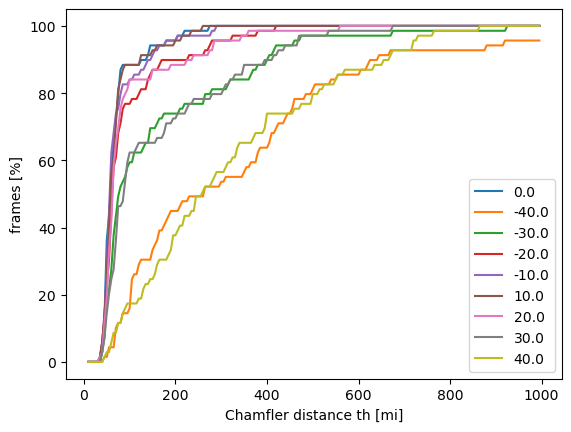

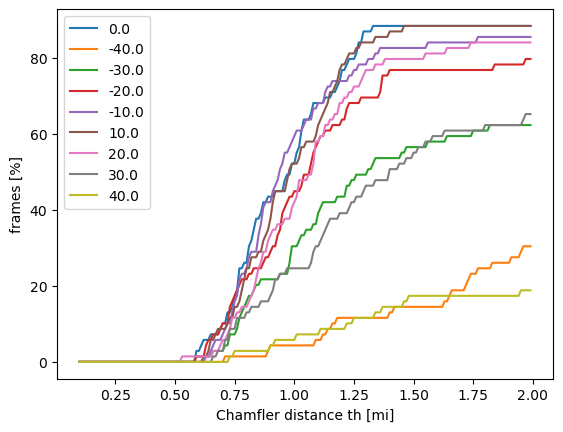

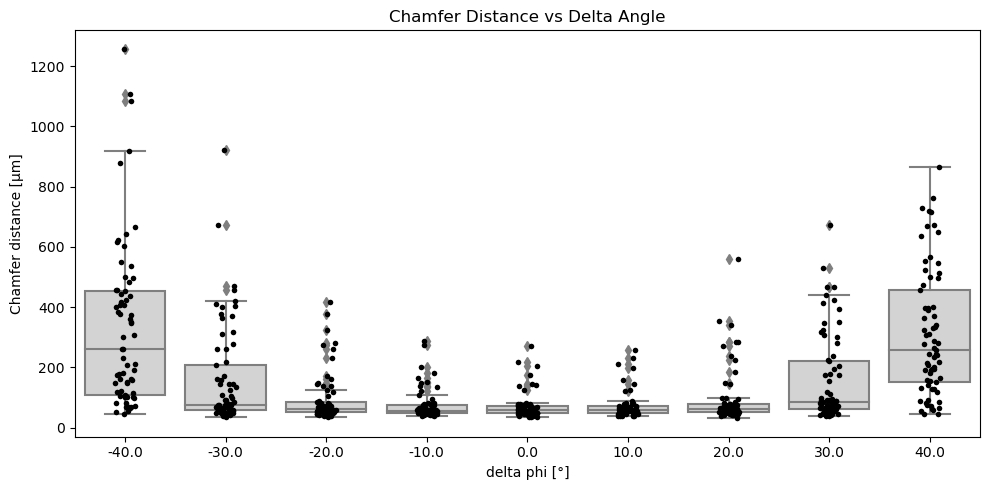

<Figure size 640x480 with 0 Axes>

In [ ]:

Plotters.plot_chamfer_frames_th(angle_name,chamfer_3d_body*1000,chamfer_stats_3d_body,np.arange(0.01*1000,1*1000,5))
plt.savefig(f'{path_figures}{angle_name}_3d_frames_th_body', transparent=True, dpi='figure', format='svg')

Plotters.plot_chamfer_frames_th(angle_name,chamfer_2d_body,chamfer_stats_2d_body,np.arange(0.1,5,0.01))
plt.savefig(f'{path_figures}{angle_name}_2d_frames_th_body', transparent=True, dpi='figure', format='svg')

Plotters.boxplot(delta_angles,chamfer_3d_wing,angle_name,showfliers = True)
plt.savefig(f'{path_figures}{angle_name}_box_plot_body', transparent=True, dpi='figure', format='svg')




In [8]:
sweep_eval.zbuff_hull['mov_36_frame_1031']
sweep_eval.zbuff_model['mov_36_frame_1031']

array([[ 0.00148255, -0.00599809, -0.00029748],
       [ 0.0014929 , -0.00600822, -0.00032735],
       [ 0.00143652, -0.00603636, -0.00034573],
       ...,
       [-0.00107844, -0.00839577, -0.00154583],
       [-0.00129942, -0.0081327 , -0.00146116],
       [-0.00145041, -0.00841917, -0.00115069]])

In [44]:
hull_to_compare = {}
pth = 'D:/Documents/gaussian_model_output/hull_evaluation'
input_path_for_image = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/'

with open(f'{pth}/hull_files.txt', 'r') as f:
    mov_hull_ini = [line.strip() for line in f]
mov_frame = [(int(mov_name.split('_')[1]),int(mov_name.split('_')[3])) for mov_name in mov_hull_ini]

hull_to_compare = {mov_name: FlyOutput(f'{input_path_for_image}/mov{mov_frame[0]}_2023_08_09_60ms/',mov_frame[1],f'{pth}/',None,mov_frame[1],iteration,f'',frames_dict = frames) for mov_frame,mov_name in zip(mov_frame,mov_hull_ini)}
zbuff_hull = [all_movs[mov_name][0].homog_and_zbuff( hull_to_compare[mov_name].xyz) for mov_name in mov_hull_ini]
zbuff_model = [all_movs[mov_name][0].homog_and_zbuff( all_movs[mov_name][0].xyz) for mov_name in mov_hull_ini]


for mov_name in mov_hull_ini:
    hull_to_compare[mov_name].zbuff_hull = all_movs[mov_name][0].homog_and_zbuff( all_movs[mov_name][0].xyz)

for mov_name in mov_hull_ini:
    all_movs[mov_name][0].zbuff_all = all_movs[mov_name][0].homog_and_zbuff( hull_to_compare[mov_name].xyz)




In [120]:
[mov for idx,mov in enumerate(list(nominal_initial_angles.keys())) if mov not in list(all_movs.keys())]

['mov_128_frame_1620',
 'mov_78_frame_1708',
 'mov_27_frame_695',
 'mov_59_frame_1990',
 'mov_94_frame_1675',
 'mov_91_frame_3362',
 'mov_56_frame_4245',
 'mov_56_frame_4225',
 'mov_59_frame_2364',
 'mov_56_frame_3665',
 'mov_56_frame_4230',
 'mov_56_frame_5853']

In [119]:
[idx for idx,mov in enumerate(list(nominal_initial_angles.keys())) if mov not in list(all_movs.keys())]

[0, 92, 140, 143, 150, 157, 158, 159, 160, 161, 162, 163]

In [10]:
# load output of gs with hull initialization
iteration = 2000
path = 'D:/Documents/gaussian_model_output/hull_evaluation'
hull_to_compare = {}
for mov_name in tqdm(list(sweep_eval.sweep.keys())):
    # try:
        mov = int(mov_name.split('_')[1]) 
        frame = int(mov_name.split('_')[3]) 
        image_path =  f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/mov{mov}_2023_08_09_60ms/'
        file_name = f''
        output_angles_weights = None
        interest_points_path = f'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/evaluation/points/mov{mov}'
        input_dir = f'{path}/'
        hull_to_compare[mov_name] = FlyOutput(image_path,frame,input_dir,output_angles_weights,frame,iteration,file_name,frames_dict = frames)
        hull_to_compare[mov_name].zbuff_hull = all_movs[mov_name][0].homog_and_zbuff( hull_to_compare[mov_name].xyz)
        all_movs[mov_name][0].zbuff_all = all_movs[mov_name][0].homog_and_zbuff( all_movs[mov_name][0].xyz)
    # except:
    #     continue

100%|██████████| 3/3 [00:00<00:00,  6.46it/s]


(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01028649, 0.01061504, 0.0109436 , 0.01127215, 0.0116007 ,
        0.01192926, 0.01225781, 0.01258636, 0.01291492, 0.01324347,
        0.01357202, 0.01390058, 0.01422913, 0.01455768, 0.01488624,
        0.01521479, 0.01554334, 0.0158719 , 0.01620045, 0.016529  ,
        0.01685756, 0.01718611, 0.01751466, 0.01784322, 0.01817177,
        0.01850033, 0.01882888, 0.01915743, 0.01948599, 0.01981454,
        0.02014309]),
 <BarContainer object of 30 artists>)

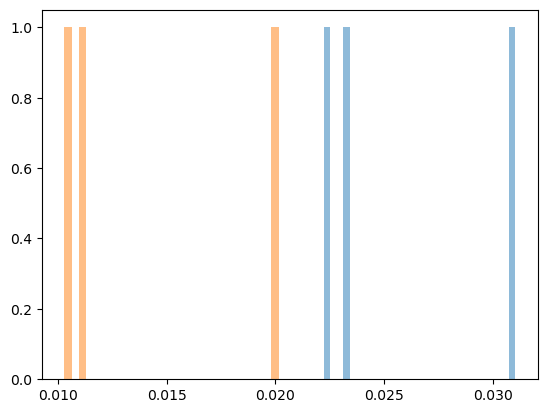

In [ ]:
# compare wing_


def get_dist_ptclouds(points1,points2):
    closest_to_hull_body = Utils.find_closest_points_inptclouds(points1,points2)
    return np.sqrt(np.sum((closest_to_hull_body - points1)**2, axis = 1))


def get_wing_body_from_hull(hull_points,gt_body,gt_wing):

    closest_to_hull_body = get_dist_ptclouds(hull_points,gt_body)
    closest_to_hull_wing = get_dist_ptclouds(hull_points,gt_wing)
    wing = closest_to_hull_wing < closest_to_hull_body
    body = closest_to_hull_body < closest_to_hull_wing
    return hull_points[wing],hull_points[body]

def devide_wings_to_parts(wing,span,num_of_parts = 4):
    projected_on_span = np.dot(wing,span)
    len_span = max(projected_on_span) - min(projected_on_span)
    projected_parts = [projected_on_span[((projected_on_span - min(projected_on_span)) <= (len_span*idx/num_of_parts)) & ((projected_on_span - min(projected_on_span)) >= (len_span*(idx-1)/num_of_parts))]  for idx in range(1,num_of_parts + 1)]
    parts_bound = []
    for idx in range(len(projected_parts) - 1): 
        parts_bound.append([min(projected_parts[idx]),min(projected_parts[idx + 1])])
    parts_bound.append([min(projected_parts[-1]),max(projected_parts[-1])])
    return parts_bound


def get_parts_wing(wing,devided_wing,span):
    projected_on_span = np.dot(wing,span)
    devided_bool = [(projected_on_span >= devided_wing[0]) & (projected_on_span <= devided_wing[1]) for devided_wing in devided_wing]
    return  [wing[devided_bool] for devided_bool in devided_bool]

def calculate_projection_on_z(points,mov_name ):
    z_wing = all_movs[mov_name][0].get_principle_axes(points)[2]  # shape (3,)
    centered = points - np.mean(points, axis=0)  # shape (N, 3)
    return np.abs(np.dot(centered, z_wing) )

# wing_hull,body_hull = [get_wing_body_from_hull(hull_to_compare[mov_name].zbuff_hull,np.vstack((all_movs[mov_name][0].hull_ew)),np.vstack((all_movs[mov_name][0].all_right_wing_tagged))) for mov_name in movs_to_compare]
# wing_model,body_model = [get_wing_body_from_hull(all_movs[mov_name][0].zbuff_all,np.vstack((all_movs[mov_name][0].hull_ew)),np.vstack((all_movs[mov_name][0].all_right_wing_tagged))) for mov_name in movs_to_compare]


def get_z_project_movie(mov_name,all_movs,hull_to_compare, gt_wing,gt_body):

    wing_hull,body_hull = get_wing_body_from_hull(hull_to_compare[mov_name],gt_body,gt_wing)
    wing_model,body_model = get_wing_body_from_hull(zbuff_model[mov_name],gt_body,gt_wing)

    span = all_movs[mov_name][0].right_wing_span 
    devided_wing = devide_wings_to_parts(wing_hull,span,num_of_parts = 8)

    
    wing_hull_parts = get_parts_wing(wing_hull,devided_wing,span)
    # wing_gt_parts = get_parts_wing(frame_wings,devided_wing,span)
    wing_model_parts = get_parts_wing(wing_model,devided_wing,span)

    wing_model_parts = [wing_part for wing_part in wing_model_parts if len(wing_part) > 5]
    wing_hull_parts = [wing_hull_part for wing_model_part,wing_hull_part in zip(wing_model_parts,wing_hull_parts) if len(wing_model_part) > 5]

    z_project_hull = np.hstack([calculate_projection_on_z(wing_hull_parts[part_num],mov_name ) for part_num in range(len(wing_hull_parts))])
    z_project_model = np.hstack([calculate_projection_on_z(wing_model_parts[part_num],mov_name ) for part_num in range(len(wing_model_parts))])
    return z_project_hull,z_project_model




all_movs = sweep_eval.sweep.copy()
zbuff_model = sweep_eval.zbuff_model
hull_to_compare = sweep_eval.zbuff_hull

movs_to_compare = [mov_name for mov_name in  list(hull_to_compare.keys())[1:] if (mov_name != 'mov_36_frame_223') | (mov_name != 'mov_59_frame_2027') | (mov_name in all_movs)]



z_right_hull,z_right_model,z_left_hull,z_left_model = [],[],[],[]



for mov_name in  movs_to_compare:
        hull_wing = np.vstack((all_movs[mov_name][0].all_right_wing_tagged))
        hull_body = np.vstack((all_movs[mov_name][0].hull_ew))
        
        z_right_project_hull,z_right_project_model = get_z_project_movie(mov_name,all_movs,hull_to_compare,hull_wing,hull_body)
        z_right_hull.append(z_right_project_hull)
        z_right_model.append(z_right_project_model)

        hull_wing = np.vstack((all_movs[mov_name][0].all_left_wing_tagged))
        hull_body = np.vstack((all_movs[mov_name][0].hull_ew))
        
        z_left_project_hull,z_left_project_model = get_z_project_movie(mov_name,all_movs,hull_to_compare,hull_wing,hull_body)
        z_left_hull.append(z_left_project_hull)
        z_left_model.append(z_left_project_model)

z_hull = [(np.std(np.hstack((z_left_hull,z_right_hull)))*1000) for z_left_hull,z_right_hull in zip(z_left_hull,z_right_hull)]
z_model = [(np.std(np.hstack((z_left_model,z_right_model)))*1000) for z_left_model,z_right_model in zip(z_left_model,z_right_model)]
plt.hist(z_hull,alpha = 0.5,bins = 30)
plt.hist(z_model,alpha = 0.5,bins = 30)




In [4]:
hull_to_compare['mov_36_frame_271']

array([[-0.00716047, -0.01059498,  0.00698564],
       [-0.00711189, -0.01062952,  0.00694761],
       [-0.0070633 , -0.01066407,  0.00690959],
       ...,
       [-0.00905172, -0.01141336,  0.00557552],
       [-0.00905436, -0.01152132,  0.00560449],
       [-0.00905249, -0.01140912,  0.00550494]])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.01103614, 0.01132453, 0.01161293, 0.01190132, 0.01218972,
        0.01247811, 0.01276651, 0.0130549 , 0.0133433 , 0.01363169,
        0.01392009, 0.01420848, 0.01449688, 0.01478527, 0.01507367,
        0.01536206, 0.01565046, 0.01593885, 0.01622725, 0.01651564,
        0.01680404, 0.01709243, 0.01738083, 0.01766922, 0.01795762,
        0.01824601, 0.01853441, 0.0188228 , 0.0191112 , 0.01939959,
        0.01968799]),
 <BarContainer object of 30 artists>)

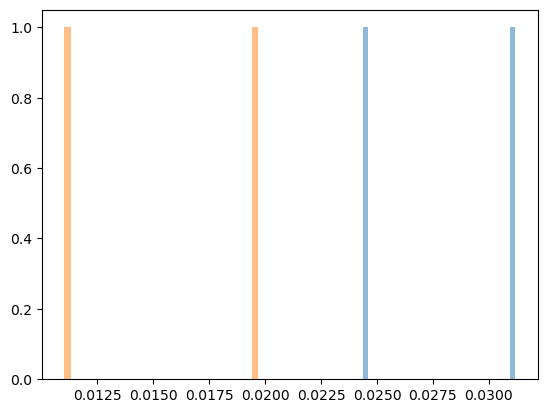

In [ ]:
# compare wing_


def get_dist_ptclouds(points1,points2):
    closest_to_hull_body = Utils.find_closest_points_inptclouds(points1,points2)
    return np.sqrt(np.sum((closest_to_hull_body - points1)**2, axis = 1))


def get_wing_body_from_hull(hull_points,gt_body,gt_wing):

    closest_to_hull_body = get_dist_ptclouds(hull_points,gt_body)
    closest_to_hull_wing = get_dist_ptclouds(hull_points,gt_wing)
    wing = closest_to_hull_wing < closest_to_hull_body
    body = closest_to_hull_body < closest_to_hull_wing
    return hull_points[wing],hull_points[body]

def devide_wings_to_parts(wing,span,num_of_parts = 4):
    projected_on_span = np.dot(wing,span)
    len_span = max(projected_on_span) - min(projected_on_span)
    projected_parts = [projected_on_span[((projected_on_span - min(projected_on_span)) <= (len_span*idx/num_of_parts)) & ((projected_on_span - min(projected_on_span)) >= (len_span*(idx-1)/num_of_parts))]  for idx in range(1,num_of_parts + 1)]
    parts_bound = []
    for idx in range(len(projected_parts) - 1): 
        parts_bound.append([min(projected_parts[idx]),min(projected_parts[idx + 1])])
    parts_bound.append([min(projected_parts[-1]),max(projected_parts[-1])])
    return parts_bound


def get_parts_wing(wing,devided_wing,span):
    projected_on_span = np.dot(wing,span)
    devided_bool = [(projected_on_span >= devided_wing[0]) & (projected_on_span <= devided_wing[1]) for devided_wing in devided_wing]
    return  [wing[devided_bool] for devided_bool in devided_bool]

def calculate_projection_on_z(points,mov_name ):
    z_wing = all_movs[mov_name][0].get_principle_axes(points)[2]  # shape (3,)
    centered = points - np.mean(points, axis=0)  # shape (N, 3)
    return np.abs(np.dot(centered, z_wing) )


all_movs = sweep_eval.sweep.copy()

movs_to_compare = [mov_name for mov_name in  list(hull_to_compare.keys())[1:] if (mov_name != 'mov_36_frame_223') | (mov_name != 'mov_59_frame_2027') | (mov_name in all_movs)]
# wing_hull,body_hull = [get_wing_body_from_hull(hull_to_compare[mov_name].zbuff_hull,np.vstack((all_movs[mov_name][0].hull_ew)),np.vstack((all_movs[mov_name][0].all_right_wing_tagged))) for mov_name in movs_to_compare]
# wing_model,body_model = [get_wing_body_from_hull(all_movs[mov_name][0].zbuff_all,np.vstack((all_movs[mov_name][0].hull_ew)),np.vstack((all_movs[mov_name][0].all_right_wing_tagged))) for mov_name in movs_to_compare]


def get_z_project_movie(mov_name,all_movs,hull_to_compare, gt_wing,gt_body):

    wing_hull,body_hull = get_wing_body_from_hull(hull_to_compare[mov_name].zbuff_hull,gt_body,gt_wing)
    wing_model,body_model = get_wing_body_from_hull(all_movs[mov_name][0].zbuff_all,gt_body,gt_wing)

    span = all_movs[mov_name][0].right_wing_span 
    devided_wing = devide_wings_to_parts(wing_hull,span,num_of_parts = 8)
    wing_hull_parts = get_parts_wing(wing_hull,devided_wing,span)
    # wing_gt_parts = get_parts_wing(frame_wings,devided_wing,span)
    wing_model_parts = get_parts_wing(wing_model,devided_wing,span)

    wing_model_parts = [wing_part for wing_part in wing_model_parts if len(wing_part) > 5]
    wing_hull_parts = [wing_hull_part for wing_model_part,wing_hull_part in zip(wing_model_parts,wing_hull_parts) if len(wing_model_part) > 5]

    z_project_hull = np.hstack([calculate_projection_on_z(wing_hull_parts[part_num],mov_name ) for part_num in range(len(wing_hull_parts))])
    z_project_model = np.hstack([calculate_projection_on_z(wing_model_parts[part_num],mov_name ) for part_num in range(len(wing_model_parts))])
    return z_project_hull,z_project_model




movs_to_compare = [mov_name for mov_name in  list(hull_to_compare.keys())[1:] if (mov_name != 'mov_36_frame_223') & (mov_name != 'mov_59_frame_2027') & (mov_name in all_movs)]


z_right_hull,z_right_model,z_left_hull,z_left_model = [],[],[],[]



for mov_name in  movs_to_compare:
        hull_wing = np.vstack((all_movs[mov_name][0].all_right_wing_tagged))
        hull_body = np.vstack((all_movs[mov_name][0].hull_ew))
        
        z_right_project_hull,z_right_project_model = get_z_project_movie(mov_name,all_movs,hull_to_compare,hull_wing,hull_body)
        z_right_hull.append(z_right_project_hull)
        z_right_model.append(z_right_project_model)

        hull_wing = np.vstack((all_movs[mov_name][0].all_left_wing_tagged))
        hull_body = np.vstack((all_movs[mov_name][0].hull_ew))
        
        z_left_project_hull,z_left_project_model = get_z_project_movie(mov_name,all_movs,hull_to_compare,hull_wing,hull_body)
        z_left_hull.append(z_left_project_hull)
        z_left_model.append(z_left_project_model)

z_hull = [(np.std(np.hstack((z_left_hull,z_right_hull)))*1000) for z_left_hull,z_right_hull in zip(z_left_hull,z_right_hull)]
z_model = [(np.std(np.hstack((z_left_model,z_right_model)))*1000) for z_left_model,z_right_model in zip(z_left_model,z_right_model)]
plt.hist(z_hull,alpha = 0.5,bins = 30)
plt.hist(z_model,alpha = 0.5,bins = 30)




In [569]:
# typical length
occlusion_path = 'G:/My Drive/Research/gaussian_splatting/gaussian_splatting_input/points_occlusion.csv'
oc_table = pd.read_csv(occlusion_path)

np.sum((oc_table[['x0','y0','z0']].to_numpy() - oc_table[['x1','y1','z1']].to_numpy())**2,axis = 1)

array([0.5256, 0.6404, 0.6269, 0.146 , 0.51  , 0.82  , 2.57  , 0.4101,
       0.1608, 3.77  , 1.5   , 1.0976, 2.04  , 1.61  , 1.36  , 1.36  ,
       0.85  , 0.9389, 1.1124, 1.2489, 1.09  , 2.    , 1.64  , 1.61  ,
       0.82  , 0.76  , 1.65  ])

In [93]:
# plot ground truth 

mov_name ='mov_36_frame_271'

frame_body = all_movs[mov_name][0].hull_ew
frame_wings_right = all_movs[mov_name][0].all_right_wing_tagged
frame_wings_left = all_movs[mov_name][0].all_left_wing_tagged



colors = ['red','blue','green','black','yellow']*4
fig = go.Figure()
Plotters.scatter3d(fig,frame_body,'lime',4,'right wing boundary te',show_colorbar = False,mode=' markers')
Plotters.scatter3d(fig,frame_wings_right,'firebrick',8,'right wing boundary te',show_colorbar = False,mode=' markers')
[Plotters.scatter3d(fig,frame_wings_left,'slateblue',8,'right wing boundary te',show_colorbar = False,mode=' markers') for color,partwing in zip(colors,wing_hull_parts)]

fig.update_layout(
    scene=dict(
        xaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        yaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        zaxis=dict(
            visible=False,
            showgrid=False,
            showticklabels=False,
            showline=False,
            zeroline=False
        ),
        bgcolor='white'
    )
)
fig.show()


In [15]:
sweep_eval.sweep['mov_36_frame_1031'][0].right_wing_tagged

array([[ 7.69359261e-04, -8.98061898e-03,  2.39101816e-04],
       [ 9.68389529e-04, -9.04704294e-03,  3.65665633e-04],
       [ 1.21541922e-03, -9.14201455e-03,  4.24870575e-04],
       [ 1.38024463e-03, -9.20067784e-03,  4.71486480e-04],
       [ 1.60045716e-03, -9.23335970e-03,  5.39422821e-04],
       [ 1.76742893e-03, -9.24808724e-03,  5.90479802e-04],
       [ 1.96238485e-03, -9.25760427e-03,  5.69259485e-04],
       [ 2.19716073e-03, -9.24146970e-03,  4.76593022e-04],
       [ 1.51358090e-03, -9.04865425e-03, -5.26393218e-04],
       [ 1.12211622e-03, -9.02437488e-03, -6.60040896e-04],
       [ 8.24914360e-04, -8.98754804e-03, -6.80847275e-04],
       [ 1.76373746e-03, -9.06943221e-03, -4.08006067e-04],
       [ 1.90991108e-03, -9.05077098e-03, -3.23896036e-04],
       [ 2.19784915e-03, -9.06030833e-03, -7.63870674e-05],
       [ 2.32798015e-03, -9.09422553e-03,  1.20287293e-04],
       [ 2.32277469e-03, -9.20759220e-03,  3.17629604e-04],
       [ 6.03731630e-04, -8.90294545e-03

In [77]:

spn[0]


0.9210458516862461

In [2]:
spn = np.atleast_2d(sweep_eval.sweep['mov_36_frame_1031'][0].right_gt_wing_span)
projected_chord = np.dot(reordered - np.mean(reordered, axis = 0),chord[0])
projected_span = np.dot(reordered - np.mean(reordered, axis = 0),spn[0])


np.argmin(sum([min(projected_chord),max(projected_chord)])/2 - projected_chord)
middle_chord = sum([min(projected_chord),max(projected_chord)])/2
le = reordered[projected_chord > middle_chord,:]

te = reordered[projected_chord < middle_chord,:]
tip = reordered[np.argmax(projected_span),:]
tip

spn = (tip - np.mean(reordered, axis = 0))/np.linalg.norm((tip - np.mean(reordered, axis = 0)))


NameError: name 'reordered' is not defined

In [7]:
sweep_eval.sweep['mov_36_frame_1031'][0].right_wing_tagged

array([[ 7.69359261e-04, -8.98061898e-03,  2.39101816e-04],
       [ 9.68389529e-04, -9.04704294e-03,  3.65665633e-04],
       [ 1.21541922e-03, -9.14201455e-03,  4.24870575e-04],
       [ 1.38024463e-03, -9.20067784e-03,  4.71486480e-04],
       [ 1.60045716e-03, -9.23335970e-03,  5.39422821e-04],
       [ 1.76742893e-03, -9.24808724e-03,  5.90479802e-04],
       [ 1.96238485e-03, -9.25760427e-03,  5.69259485e-04],
       [ 2.19716073e-03, -9.24146970e-03,  4.76593022e-04],
       [ 2.32277469e-03, -9.20759220e-03,  3.17629604e-04],
       [ 2.32798015e-03, -9.09422553e-03,  1.20287293e-04],
       [ 2.19784915e-03, -9.06030833e-03, -7.63870674e-05],
       [ 1.90991108e-03, -9.05077098e-03, -3.23896036e-04],
       [ 1.76373746e-03, -9.06943221e-03, -4.08006067e-04],
       [ 1.51358090e-03, -9.04865425e-03, -5.26393218e-04],
       [ 1.12211622e-03, -9.02437488e-03, -6.60040896e-04],
       [ 8.24914360e-04, -8.98754804e-03, -6.80847275e-04],
       [ 6.03731630e-04, -8.90294545e-03

In [10]:



chord = np.atleast_2d(sweep_eval.sweep['mov_36_frame_1031'][0].right_gt_wing_chord)

toplot = sweep_eval.sweep['mov_36_frame_1031'][0]

reordered = toplot.right_wing_tagged

# t = np.linspace(-0.001, 0.0015, 100)  # Small range since your data seems very small-scale

# r_line_points = np.mean(reordered, axis = 0) + t[:, np.newaxis] * spn
# l_line_points = np.mean(reordered, axis = 0) + t[:, np.newaxis] * chord

# le = reordered[np.dot(reordered - np.mean(reordered, axis = 0),chord[0])> 0 ,:]


# le,te = toplot.get_wing_le_te(reordered - np.mean(reordered, axis = 0),-spn[0],chord[0], perc_wing = 0.7,num_of_bins = 30)

le = reordered[0:reordered.shape[0]//2,:]
te = reordered[reordered.shape[0]//2:,:]


colors = ['red','blue','green','black','yellow']*4
fig = go.Figure()
Plotters.scatter3d(fig,toplot.right_wing_tagged,'lime',4,'right wing boundary te',show_colorbar = False,mode=' markers')
Plotters.scatter3d(fig,toplot.body,'magenta',8,'right wing boundary te',show_colorbar = False,mode=' markers')
# Plotters.scatter3d(fig,r_line_points,'black',4,'right wing boundary te',show_colorbar = False,mode=' markers') 
Plotters.scatter3d(fig,le,'black',4,'right wing boundary te',show_colorbar = False,mode=' markers') 
# Plotters.scatter3d(fig,l_line_points,'black',4,'right wing boundary te',show_colorbar = False,mode=' markers') 

fig.show()

In [ ]:
# plot wing parts  (each part has its normal, we compare the width of the model to the width of the hull for each part)


mov_name = 'mov_36_frame_981'


frame_body = all_movs[mov_name][0].hull_ew
frame_wings = all_movs[mov_name][0].all_right_wing_tagged
hull_wing = np.vstack((frame_wings))
hull_body = np.vstack((frame_body))


wing_hull,body_hull = get_wing_body_from_hull(hull_to_compare[mov_name].zbuff_hull,hull_body,hull_wing)
wing_model,body_model = get_wing_body_from_hull(all_movs[mov_name][0].zbuff_all,hull_body,hull_wing)

span = all_movs[mov_name][0].right_wing_span 
devided_wing = devide_wings_to_parts(wing_hull,all_movs[mov_name][0].right_wing_span ,num_of_parts = 10)
body = np.vstack((frame_body))


wing_hull_parts = get_parts_wing(wing_hull,devided_wing,span)
wing_gt_parts = get_parts_wing(frame_wings,devided_wing,span)
wing_model_parts = get_parts_wing(wing_model,devided_wing,span)




colors = ['red','blue','green','black','yellow']*4
fig = go.Figure()
Plotters.scatter3d(fig,body_hull,'lime',4,'right wing boundary te',show_colorbar = False,mode=' markers')
Plotters.scatter3d(fig,frame_wings,'magenta',8,'right wing boundary te',show_colorbar = False,mode=' markers')
[Plotters.scatter3d(fig,partwing,color,4,'right wing boundary te',show_colorbar = False,mode=' markers') for color,partwing in zip(colors,wing_hull_parts)]
fig.show()


colors = ['red','blue','green','black','yellow']*4
fig = go.Figure()
Plotters.scatter3d(fig,body,'lime',4,'right wing boundary te',show_colorbar = False,mode=' markers')
Plotters.scatter3d(fig,frame_wings,'magenta',8,'right wing boundary te',show_colorbar = False,mode=' markers')
[Plotters.scatter3d(fig,partwing,color,4,'right wing boundary te',show_colorbar = False,mode=' markers') for color,partwing in zip(colors,wing_model_parts)]
fig.show()



Saved animation to: D:/Documents/gaussian_model_output//fly_yaw_delta10_sweep_m40_40/animated_plot.html


In [ ]:
# initial angles of ground truth data



bod, right_wing,left_wing = [],[],[]
mov_names = list(nominal_initial_angles.keys())
for mov_name in mov_names[2:4]:
    mov = int(mov_name.split('_')[1]) 
    frame = int(mov_name.split('_')[3]) 
    input_dir = f'{path_output}/{model_name}'
    path = f'D:/Documents/gaussian_model_output/{model_name}/{frame}/initial/'
    dir_names = [name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]
    ini_angles = {idx:open_file(f'{path}/{dir}') for idx,dir in enumerate(dir_names)}

    bod.append(ini_angles[0]['body_angles'] )
    right_wing.append(ini_angles[0]['right_wing_angles'] )
    left_wing.append(ini_angles[0]['left_wing_angles'] )

# right_wing = np.vstack(right_wing)
plt.figure(),plt.plot(right_wing[:,0],right_wing[:,2],'*')
plt.figure(),plt.plot(left_wing)


In [ ]:
import open3d as o3d
points = all_movs['mov_121_frame_2000'][0].right_wing

# Load or create your point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Estimate normals if not available
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=5, max_nn=30))
pcd.normalize_normals()


# Run Poisson reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)
mesh.compute_vertex_normals()

# Visualize
o3d.visualization.draw_geometries([mesh])

In [ ]:
from skimage.measure import marching_cubes
import trimesh
from scipy.ndimage import gaussian_filter
from scipy.ndimage import distance_transform_edt

grid_size = 100 
points = all_movs['mov_121_frame_2000'][0].xyz_rotated
volume = np.zeros((grid_size, grid_size, grid_size), dtype=np.float32)

# 3. Convert point coordinates to voxel indices
min_bounds = points.min(axis=0)
max_bounds = points.max(axis=0)
scale = (grid_size - 1) / (max_bounds - min_bounds)
voxel_indices = ((points - min_bounds) * scale).astype(np.int32)

# Fill the volume
for x, y, z in voxel_indices:
    volume[x, y, z] = 1.0
# Optional: smooth the volume
volume = gaussian_filter(volume, sigma=0.2)

# 1. Compute Signed Distance Field (SDF)
# Outside = distance from 0s to 1s
outside = distance_transform_edt(volume == 0)

# Inside = distance from 1s to 0s
inside = distance_transform_edt(volume == 1)

# Signed distance field: negative inside, positive outside
sdf = outside - inside

# 2. Apply marching cubes on the zero level set (surface boundary)
# verts, faces, normals, values = marching_cubes(sdf, level=0.0)
verts, faces,normals, values = marching_cubes(sdf,0,allow_degenerate=False,spacing=(1, 1, 1))  
# 5. Create mesh and export/visualize
verts = verts / scale + min_bounds

mesh = trimesh.Trimesh(vertices=verts, faces=faces, vertex_normals=normals)

mesh.show()  # pop
mesh.export('mesh.obj')

In [ ]:
import open3d as o3d
import numpy as np
points = all_movs['mov_121_frame_2000'][0].body

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 2. Estimate normals (required for Poisson)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.05, max_nn=30))
pcd.orient_normals_consistent_tangent_plane(10)  # Optional: improve consistency

# 3. Apply Poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=4)  # try 8–11

# 4. Crop to bounding box (optional, removes far artifacts)
bbox = pcd.get_axis_aligned_bounding_box().scale(1.05, pcd.get_center())
mesh = mesh.crop(bbox)

# 5. Visualize
o3d.visualization.draw_geometries([mesh])mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(verts)
mesh.triangles = o3d.utility.Vector3iVector(faces)
mesh.compute_vertex_normals()

# Sample points on the surface
pcd = mesh.sample_points_poisson_disk(number_of_points=50000)

# Estimate normals again if needed
pcd.estimate_normals()

# Run Poisson
mesh_poisson, _ = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)

In [4]:
import numpy as np
from scipy.spatial import cKDTree
# Two 3D point clouds: A (Nx3), B (Mx3)
A = np.vstack(vxhull_hull)
B = np.vstack(wakk)
# A = np.vstack(wakk)

# Build KDTree on B
tree = cKDTree(B)

# For each point in A, find closest in B
distances, indices = tree.query(A)  # distances: (N,), indices: (N,)

# Closest points from B
closest_points = B[indices]


def find_closest_points_inptclouds(points1,points2):
    # Two 3D point clouds: points1 (Nx3), points2 (Mx3)
    tree = cKDTree(points2)

    # For each point in A, find closest in B
    distances, indices = tree.query(points1)  # distances: (N,), indices: (N,)

    # Closest points from B
    closest_points = points2[indices]
    return closest_points



closest_points = find_closest_points_inptclouds(np.vstack(vxhull_hull),np.vstack(wakk))
errors_3d_1 = np.sqrt(np.sum((closest_points - np.vstack(vxhull_hull))**2,axis = 1))  # L2 distance per point


closest_points = find_closest_points_inptclouds(np.vstack(wakk),np.vstack(vxhull_hull))
errors_3d_2 = np.sqrt(np.sum((closest_points - np.vstack(wakk))**2,axis = 1))  # L2 distance per point


np.mean(errors_3d_1) + np.mean(errors_3d_2)


def calc2d_error(frame,fitted,original):
    bound_on_ew = (frame.ew_to_lab.T @ fitted.T ).T
    interest_to_ew = (frame.ew_to_lab.T @ original.T).T
    projected_interest = [np.fliplr(frame2d.project_with_proj_mat(interest_to_ew)[:,0:2]) for frame2d in frame.frames]
    projected_gs = [np.fliplr(frame2d.project_with_proj_mat(bound_on_ew)[:,0:2]) for frame2d in frame.frames]
    diff = np.vstack(projected_interest) - np.vstack(projected_gs)
    errors_2d = np.linalg.norm(diff, axis=1)  # Euclidean reprojection error per point
    errors_2d_l1 = np.sum(np.abs(diff),axis = 1)  # Euclidean reprojection error per point
    return errors_2d,errors_2d_l1
    
# errors_2d,errors_2d_l1 = calc2d_error(frame,closest_points,A)
chamfer = 0.5*(np.mean(errors_3d_1) + np.mean(errors_3d_2))*1000
chamfer


NameError: name 'vxhull_hull' is not defined

In [86]:
print(np.mean(np.vstack(vxhull_hull),axis = 0),np.mean(np.vstack(wakk),axis = 0))

[0.01277063 0.00457726 0.00331197] [0.01271207 0.00457384 0.00345333]


In [3]:

frame = all_frames[0]

fig = go.Figure()
Plotters.scatter3d(fig,frame.right_wing_tagged,'crimson',4,'right wing boundary le',show_colorbar = False,mode='lines + markers')
# Plotters.scatter3d(fig,frame.right_wing_tagged,'crimson',4,'right wing boundary te',show_colorbar = False,mode='lines + markers')

Plotters.scatter3d(fig,frame.right_wing_boundary,'crimson',4,'right wing boundary le',show_colorbar = False,mode='lines + markers')
# Plotters.scatter3d(fig,frame.right_wing_boundary,'crimson',4,'right wing boundary te',show_colorbar = False,mode='lines + markers')

# Plotters.scatter3d(fig,frame.right_wing,'red',2,'right wing',show_colorbar = False,mode=' markers')
# Plotters.scatter3d(fig,frame.right_wing_tagged_le,'magenta',6,'tagged points le',show_colorbar = False,mode=' lines + markers')

Plotters.scatter3d(fig,frame.bound_on_interest_rw_te,'black',6,'fitted on boundary tag le',show_colorbar = False,mode='  markers')
Plotters.scatter3d(fig,frame.interest_on_bound_rw_te,'gray',6,'fitted on boundary tag te',show_colorbar = False,mode='  markers')


Plotters.scatter3d(fig,frame.left_wing_tagged,'crimson',4,'right wing boundary le',show_colorbar = False,mode='lines + markers')
# Plotters.scatter3d(fig,frame.right_wing_tagged,'crimson',4,'right wing boundary te',show_colorbar = False,mode='lines + markers')

Plotters.scatter3d(fig,frame.left_wing_boundary,'crimson',4,'right wing boundary le',show_colorbar = False,mode='lines + markers')
# Plotters.scatter3d(fig,frame.right_wing_boundary,'crimson',4,'right wing boundary te',show_colorbar = False,mode='lines + markers')

# Plotters.scatter3d(fig,frame.right_wing,'red',2,'right wing',show_colorbar = False,mode=' markers')
# Plotters.scatter3d(fig,frame.right_wing_tagged_le,'magenta',6,'tagged points le',show_colorbar = False,mode=' lines + markers')

Plotters.scatter3d(fig,frame.bound_on_interest_lw_te,'black',6,'fitted on boundary tag le',show_colorbar = False,mode='  markers')
Plotters.scatter3d(fig,frame.interest_on_bound_lw_te,'gray',6,'fitted on boundary tag te',show_colorbar = False,mode='  markers')


# # Plotters.scatter3d(fig,frame.right_wing_tagged_te,'magenta',6,'tagged points le',show_colorbar = False,mode=' lines + markers')
# Plotters.scatter3d(fig,frame.bound_on_interest_rw_te,'black',6,'boundary on fitted tag le',show_colorbar = False,mode=' lines + markers')
# Plotters.scatter3d(fig,frame.bound_on_interest_rw_le,'black',4,'fitted boundary',show_colorbar = False)
# Plotters.scatter3d(fig,frame.left_wing_boundary_le,'#1f77b4',3,'left wing boundary',show_colorbar = False,mode='lines + markers')
# # Plotters.scatter3d(fig,frame.left_wing,'blue',2,'left wing',show_colorbar = False,mode=' markers')
# Plotters.scatter3d(fig,frame.left_wing_tagged_le,'#17becf',6,'tagged points',show_colorbar = False,mode=' lines +markers')
# Plotters.scatter3d(fig,frame.bound_on_interest_lw_le,'black',4,'fitted boundary',show_colorbar = False)

Plotters.scatter3d(fig,frame.body,'green',4,'body',show_colorbar = False,mode=' markers')

fig.show()

In [8]:

frame = all_frames[0]

fig = go.Figure()
Plotters.scatter3d(fig,frame.right_wing_boundary_le,'crimson',4,'right wing boundary le',show_colorbar = False,mode='lines + markers')
Plotters.scatter3d(fig,frame.right_wing_boundary_te,'crimson',4,'right wing boundary te',show_colorbar = False,mode='lines + markers')

# Plotters.scatter3d(fig,frame.right_wing,'red',2,'right wing',show_colorbar = False,mode=' markers')
Plotters.scatter3d(fig,frame.right_wing_tagged_le,'magenta',6,'tagged points le',show_colorbar = False,mode=' lines + markers')

# Plotters.scatter3d(fig,frame.bound_on_interest_rw_le,'black',6,'boundary on fitted tag le',show_colorbar = False,mode=' lines + markers')
Plotters.scatter3d(fig,frame.bound_on_interest_rw_te,'gray',6,'boundary on fitted tag te',show_colorbar = False,mode=' lines + markers')

Plotters.scatter3d(fig,frame.right_wing_tagged_te,'magenta',6,'tagged points le',show_colorbar = False,mode=' lines + markers')
Plotters.scatter3d(fig,frame.bound_on_interest_rw_te,'black',6,'boundary on fitted tag le',show_colorbar = False,mode=' lines + markers')
# Plotters.scatter3d(fig,frame.bound_on_interest_rw_le,'black',4,'fitted boundary',show_colorbar = False)
# Plotters.scatter3d(fig,frame.left_wing_boundary_le,'#1f77b4',3,'left wing boundary',show_colorbar = False,mode='lines + markers')
# Plotters.scatter3d(fig,frame.left_wing,'blue',2,'left wing',show_colorbar = False,mode=' markers')
# Plotters.scatter3d(fig,frame.left_wing_tagged_le,'#17becf',6,'tagged points',show_colorbar = False,mode=' lines +markers')
# Plotters.scatter3d(fig,frame.bound_on_interest_lw_le,'black',4,'fitted boundary',show_colorbar = False)

Plotters.scatter3d(fig,frame.body,'green',4,'body',show_colorbar = False,mode=' markers')

fig.show()

In [6]:
frame.right_wing_boundary_le
frame.right_wing_tagged_le

fig = go.Figure()
Plotters.scatter3d(fig,frame.right_wing_boundary_le,'crimson',4,'right wing boundary',show_colorbar = False,mode='lines + markers')
Plotters.scatter3d(fig,frame.right_wing_tagged_le,'magenta',6,'tagged points',show_colorbar = False,mode=' markers')

Plotters.scatter3d(fig,frame.body,'green',4,'body',show_colorbar = False,mode=' markers')

fig.show()

In [5]:
frame = all_frames[0]





fig = go.Figure()
Plotters.scatter3d(fig,frame.left_wing_boundary,'crimson',4,'right wing boundary',show_colorbar = False,mode='lines + markers')
Plotters.scatter3d(fig,frame.interest_left_wing_boundry,'magenta',6,'tagged points',show_colorbar = False,mode=' markers')

Plotters.scatter3d(fig,frame.body,'green',4,'body',show_colorbar = False,mode=' markers')

fig.show()

AttributeError: 'Evaluation' object has no attribute 'interest_left_wing_boundry'

In [58]:
frame = all_frames[0]
right_bound = frame.right_wing_boundary 
right_bound_center =  right_bound - np.mean(right_bound,axis = 0)
chord = frame.right_wing_chord
span = frame.right_wing_span
left_bound_chord = np.dot(right_bound_center,chord)
left_bound_span = np.dot(right_bound_center,span)

points = np.column_stack((left_bound_span,left_bound_chord))
idx_to_roll = np.argmin(left_bound_span)

plt.plot(left_bound_span,left_bound_chord)


In [13]:
[int(mov_name.split('_')[3])
  for mov_name in all_movs.keys()]

[1620,
 1031,
 352,
 443,
 271,
 492,
 865,
 223,
 261,
 1049,
 482,
 1053,
 981,
 252,
 238,
 890,
 983,
 1166,
 960,
 834,
 757,
 483,
 839,
 1104,
 1692,
 863,
 854,
 1341,
 943,
 958,
 1650,
 384,
 2055,
 1250,
 1215,
 969,
 418,
 1257,
 1060,
 436,
 4272,
 2346,
 3605,
 4211,
 2926,
 2347,
 2366,
 2656,
 3190,
 2618,
 2984,
 3186,
 1012,
 2979,
 4213,
 4448,
 1499,
 4205,
 4373,
 2532,
 306,
 2088,
 318,
 505,
 2000,
 296,
 2097,
 2774,
 292,
 1625,
 2870,
 1762,
 334,
 2553,
 2565,
 344,
 3903,
 2195,
 2390,
 2245,
 3075,
 2939,
 1834,
 3163,
 2237,
 4255,
 2961,
 920,
 2935,
 2129,
 493,
 488,
 2216,
 3115,
 480,
 1085,
 2011,
 4950,
 3771,
 405,
 5817,
 3698,
 3099,
 4696,
 1695,
 413,
 4617,
 1003,
 3159,
 3090,
 3893,
 5869,
 489,
 2033,
 5715,
 5656,
 5865,
 4601,
 2672,
 2156,
 4954,
 2036,
 1165,
 4538,
 3578,
 2872,
 1248,
 2657,
 1157,
 2708,
 4690,
 2783,
 681,
 2016,
 2027,
 1950,
 691,
 3096,
 1975,
 3068,
 1923,
 5369,
 5818,
 1266,
 3702,
 1194,
 3706,
 5290,
 1568,

In [118]:
import plotly.graph_objects as go
import numpy as np


color_list = ['lime','crimson','magenta','magenta','dodgerblue','blue','blue','black','orange']
name_list = ['body','right wing','right wing le','right wing te','left wing','left wing le','left wing te','Ground truth','gaussian points']
size_list = [2,2,4,4,2,4,4,5,5]
framestart = 1031
frame_end = 1032
frames = [int(mov_name.split('_')[3]) for mov_name in all_movs.keys()]

output_path = f'{path_output}/{model_name}/animated_plot.html'


# === HELPERS ===

def create_scatter3d(xyz, color,name,size = 2):
    """Create a single 3D scatter trace for a specific part."""
    return go.Scatter3d(
        x=xyz[:, 0],
        y=xyz[:, 1],
        z=xyz[:, 2],
        mode="markers",
        name = name,
        marker=dict(size=size, opacity=1, color=color, colorscale='gray'),
    )


def get_global_bounds(xyz_list):
    """Compute global min and max coordinates over all frames for consistent axis scaling."""
    return np.min(xyz_list, axis=0), np.max(xyz_list, axis=0)


def create_frame(parts_list, color_list,size_list, frame_name,name_list):
    """Create one animation frame with all parts for a given timestep."""
    data = [
        create_scatter3d(part, color,name,size)
        for part, color,size,name in zip(parts_list, color_list, size_list,name_list)
    ]
    return go.Frame(data=data, name=frame_name)


def create_play_pause_buttons():
    """Return Play/Pause button definitions for animation."""
    return [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate",
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate",
                },
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
        }
    ]

def create_slider(frame_nums):
    """Create a slider using actual frame numbers."""
    return [
        {
            "active": 0,
            "steps": [
                {
                    "args": [[str(i)], {"frame": {"duration": 100, "redraw": True}, "mode": "immediate"}],
                    "label": str(frame_num),
                    "method": "animate",
                }
                for i, frame_num in enumerate(frame_nums)
            ],
        }
    ]


# === MAIN FUNCTION ===

def create_3d_animation(frames_list, color_list,xyz_all_frames,size_list,name_list):
    """Build and show the 3D animation."""
    # frame_nums = [f.frame_num for f in frames_list[framestart - frame0:frame_end - frame0]]
    frame_nums = [frame.frame_num for frame in frames_list]
    min_xyz, max_xyz = get_global_bounds(xyz_all_frames)

    # Initial frame data
    intial_parts = [frames_list[0].body,frames_list[0].right_wing,frames_list[0].right_wing_le,frames_list[0].right_wing_te,frames_list[0].left_wing,frames_list[0].left_wing_le,frames_list[0].left_wing_te, frames_list[0].rotated_points_3d]
    initial_data = [
        create_scatter3d(part, color,name,size)
        for  part,color,size,name in zip(intial_parts, color_list,size_list,name_list)
    ]
    bounding_box_trace = go.Scatter3d(

    mode='markers',
    marker=dict(size=0.1, color='rgba(0,0,0,0)'),
    showlegend=False
    )
    initial_data.append(bounding_box_trace)
    # Create frames for animation
    frames_data = [
        create_frame([xyz_frame.body,xyz_frame.right_wing,xyz_frame.right_wing_le,xyz_frame.right_wing_te,xyz_frame.left_wing,xyz_frame.left_wing_le,xyz_frame.left_wing_te, xyz_frame.rotated_points_3d], color_list,size_list, str(i),name_list)
        for i, xyz_frame in enumerate(frames_list)
    ]

    # Build full figure
    fig = go.Figure(
        data=initial_data,
        layout=go.Layout(
            scene=dict(
                xaxis_title="X",
                yaxis_title="Y",
                zaxis_title="Z",
            ),
            updatemenus=create_play_pause_buttons(),
            sliders=create_slider(frame_nums),
        ),
        frames=frames_data,
    )

    fig.show()
    fig.write_html(output_path)
    print(f"Saved animation to: {output_path}")

frame_list = [all_movs[mov_name][1] for mov_name in all_movs.keys()]
xyz_all_frames = np.vstack([frame.xyz_rotated*1000 for frame in frame_list])
create_3d_animation(frame_list, color_list,xyz_all_frames,size_list,name_list)




    # point_3d_per_frame.append(np.vstack(points_3d))
    # gaussians_interest_points.append(gaussian_points)

NameError: name 'all_movs' is not defined

In [ ]:
frame_list = [all_movs[mov_name][1] for mov_name in all_movs.keys()]

In [527]:
    import itertools
    yaw_grid = np.hstack(np.arange(0,360,30))
    roll_grid = np.hstack(np.arange(-30,30,10))
    psi_grid = np.hstack((np.arange(-160,0,30)))
    phi_grid = np.hstack((np.arange(-90,90,30)))

    roll_yaw = list(itertools.product(yaw_grid,roll_grid))
    psi_phi = list(itertools.product(psi_grid,phi_grid))
    # roll_yaw = roll_grid
    # pitch_grid = np.hstack((0.0,np.arange(-20,0,5),np.arange(5,20,5)))
    roll_yaw = roll_yaw + psi_phi

In [530]:
108-36

72

In [54]:
frame = 370
color = frames_list[frame - frame0].color
idx_part = frames_list[frame - frame0].idx_parts


grayscale = (color[:,0] - color[:,0].min()) / (color[:,0].max() - color[:,0].min())

opacity = frames_list[frame - frame0].opacity * grayscale
# grayscale = grayscale[grayscale <1]

frame = frames_list[frame-frame0]
fig = go.Figure()
Plotters.scatter3d(fig,frame.body,'green',3,'body',show_colorbar = False)
Plotters.scatter3d(fig,frame.right_wing,opacity[idx_part[1]],2,'right wing',show_colorbar = False)
Plotters.scatter3d(fig,frame.left_wing,opacity[idx_part[2]],2,'left wing',show_colorbar = False)
Plotters.scatter3d(fig,frame.rotated_points_3d[7:8,:],'blue',5,'interest',show_colorbar = False)
# Plotters.scatter3d(fig,frames_list[frame-frame0].gaussian_closest_to_interest,'orange',5,'interest gauss',show_colorbar = False)
Plotters.scatter3d(fig,frame.right_wing_le,'magenta',4,'le',show_colorbar = False)
Plotters.scatter3d(fig,frame.right_wing_te,'cyan',4,'te',show_colorbar = False)

Plotters.scatter3d(fig,frame.left_wing_le,'magenta',4,'le',show_colorbar = False)
Plotters.scatter3d(fig,frame.left_wing_te,'cyan',4,'te',show_colorbar = False)


t = np.linspace(-0.001, 0.0015, 100)  # Small range since your data seems very small-scale

r_line_points = frame.right_wing_origin + t[:, np.newaxis] * frame.right_wing_span
l_line_points = frame.left_wing_origin + t[:, np.newaxis] * frame.left_wing_span
idx_closest = np.unique([np.argsort(frame.dist_points(point,frame.body))[0:10] for point in r_line_points])
# idx_origin = np.argmin(np.dot(frame.body[idx_closest,:],frame.right_wing_direction))
idx_origin = np.argmax([np.min(np.dot(frame.body[idx_closest,:],r_line_points.T)) for idx_closest in idx_closest])
idx_origin


Plotters.scatter3d(fig,r_line_points,'orange',3,'wing',show_colorbar = False)
Plotters.scatter3d(fig,l_line_points,'orange',3,'wing',show_colorbar = False)
# Plotters.scatter3d(fig,np.atleast_2d(frame.body[idx_closest[idx_origin],:]),'black',10,'wing',show_colorbar = False)

# Plotters.scatter3d(fig,frame.gaussian_closest_to_interest,'orange',5,'interest gauss',show_colorbar = False)
# Plotters.scatter3d(fig,frame.body_interest_gaussian,'orange',5,'interest gauss',show_colorbar = False)
# dot_on_le = np.dot(-frame.right_wing_direction,frame.right_wing_le.T)
# length = (np.max(dot_on_le) - np.min(dot_on_le))
# lt20p = frame.right_wing_le[(dot_on_le  - np.min(dot_on_le))> length*0.1,:]
# Plotters.scatter3d(fig,frame.rotated_points_3d[8:16],'orange',3,'interest gauss',show_colorbar = False)
# Plotters.scatter3d(fig, np.vstack((np.mean(frame.bottom,axis = 0) - frame.xbody*2/1000,np.mean(frame.body,axis = 0) + frame.xbody*2/1000)),'black',5,'x',mode = 'markers+lines') 
# Plotters.scatter3d(fig, lt20p,'magenta',5,'x') 
# Plotters.scatter3d(fig,bod_ax_top,'black',3,'body',show_colorbar = False)

# Plotters.scatter3d(fig, np.atleast_2d(frame.interest_on_xbody),'black',10,'inter_on_body',mode = 'markers+lines') 
# Plotters.scatter3d(fig, frame.rotated_points_3d[16:,:],'black',10,'inter',mode = 'markers+lines') 


# fig.show()

# ax = None
# ax = Plotters.plot_projections(frame.interest_points_3d[:,:],frame.frames,color = 'magenta',ax = ax, size = 5)
# ax = Plotters.plot_projections(frame.gaussian_closest_to_interest_ew[:,:],frame.frames,color = 'orange',ax = ax, size = 5)
# # ax = Plotters.plot_projections(frame.body_interest_gaussian_ew[:,:],frame.frames,color = 'orange',ax = ax, size = 5)

# ax = None
# ax = Plotters.plot_projections(frame.right_wing_ew[:,:],frame.frames,color = 'red',ax = ax, size = 5)
# ax = Plotters.plot_projections(frame.left_wing_ew[:,:],frame.frames,color = 'blue',ax = ax, size = 5)


AttributeError: 'FlyOutput' object has no attribute 'dist_points'

In [ ]:
dot_on_le = np.dot(frame.right_wing_direction,frame.right_wing_le.T)
length = (np.max(dot_on_le) - np.min(dot_on_le))
lt20p = dot_on_le[dot_on_le > length*0.2,:]

0.002344680935456922

In [39]:
idx_origin = np.argmin([np.min(np.dot(frame.body[idx_closest,:],r_line_points.T)) for idx_closest in idx_closest])
idx_origin

89

In [ ]:
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
nrml = np.cross(frame.right_wing_span,frame.right_wing_chord)
pts_on_nrml = np.dot(wing_bound,nrml)

plt.figure(),plt.plot(pts_on_nrml)
std = np.std(pts_on_nrml)
mean = np.mean(pts_on_nrml)
plt.figure()
plt.plot((pts_on_nrml - mean)/std)


In [11]:
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
nrml = np.cross(frame.right_wing_span,frame.right_wing_chord)
pts_on_nrml = np.dot(wing_bound,nrml)
std = np.std(pts_on_nrml)
mean = np.mean(pts_on_nrml)
wing_bound = wing_bound[((pts_on_nrml - mean)/std) < 1.5]

indices_wing_bound = frame.cyclic_sort(wing_bound,frame.right_wing_span,frame.right_wing_chord)
points_2d = Utils.project_to_plane(wing_bound[indices_wing_bound], np.mean(wing_bound[indices_wing_bound],axis = 0), frame.right_wing_span,frame.right_wing_chord)
plt.figure()
plt.plot(points_2d[:,0],points_2d[:,1])

plt.figure()
plt.plot(points_2d)

In [ ]:

wing_gs,interest_rw,interest_lw = frame.zsocre_ol_calc_indices()


In [21]:
from scipy.signal import savgol_filter


frame = frames_list[-1]
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
nrml = np.cross(frame.right_wing_span,frame.right_wing_chord)
pts_on_nrml = np.dot(wing_bound,nrml)
std = np.std(pts_on_nrml)
mean = np.mean(pts_on_nrml)
wing_bound = wing_bound[((pts_on_nrml - mean)/std) < 1.5]

indices_wing_bound = frame.cyclic_sort(wing_bound,frame.right_wing_span,frame.right_wing_chord)
points_2d = Utils.project_to_plane(wing_bound[indices_wing_bound], np.mean(wing_bound[indices_wing_bound],axis = 0), frame.right_wing_span,frame.right_wing_chord)


x = savgol_filter(points_2d[:,0], 15, 2)
y = savgol_filter(points_2d[:,1], 15, 2)


plt.scatter(points_2d[:,0],points_2d[:,1])

plt.scatter(x,y)

In [ ]:
frame = frames_list[-1]
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
nrml = np.cross(frame.right_wing_span,frame.right_wing_chord)
pts_on_nrml = np.dot(wing_bound,nrml)
std = np.std(pts_on_nrml)
mean = np.mean(pts_on_nrml)
wing_bound = wing_bound[((pts_on_nrml - mean)/std) < 1.5]

indices_wing_bound = frame.cyclic_sort(wing_bound,frame.right_wing_span,frame.right_wing_chord)
points_2d = Utils.project_to_plane(wing_bound[indices_wing_bound], np.mean(wing_bound[indices_wing_bound],axis = 0), frame.right_wing_span,frame.right_wing_chord)



wing_bound = wing_bound[indices_wing_bound]
pts_to_fit = [wing_bound[k:k+3] for k in range(0,wing_bound.shape[0],3)]

fit = []
for pts in pts_to_fit[:-1]: 

    dists = np.linalg.norm(np.diff(pts, axis=0), axis=1)
    t = np.insert(np.cumsum(dists), 0, 0)  # insert 0 at the beginning
    p = np.polyfit(t, pts, 2)
    t_fit = np.linspace(t[0], t[-1], 1000)
    fit_xyz = np.vstack([np.polyval(p, t_fit) for p in p.T]).T
    fit.append(fit_xyz)
fit = np.vstack(fit)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(wing_bound[:,0], wing_bound[:,1], wing_bound[:,2], 'ro', label='Original points')
ax.plot(fit[:,0], fit[:,1], fit[:,2], 'm-', label='Fitted 2nd order curve')
ax.legend()
plt.show()

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned



In [26]:
fit.shape

(21000, 3)

In [ ]:
from math import atan2
normal_to_wing = np.cross(frame.right_wing_span,frame.right_wing_chord)

wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))



frameidx = 4
frame = frames_list[frameidx]
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
interest = frames_list[frameidx].rotated_points_3d[frame.interest_right_wing_boundry,:]



points_2d = Utils(wing_bound, np.mean(wing_bound,axis = 0), frame.right_wing_span, frame.right_wing_chord)
indices = Utils.rotational_sort(points_2d, np.mean(points_2d,axis = 0), clockwise=True)
# indices2 = rotational_sort(points_2d, np.mean(points_2d,axis = 0), clockwise=True)


wing_bound
fig = go.Figure()
# Plotters.scatter3d(fig,frame.right_wing,'red',3,'body',show_colorbar = False)
# Plotters.scatter3d(fig,interest[indices,:],'black',3,'interest',show_colorbar = False,mode='markers+lines')
Plotters.scatter3d(fig,wing_bound[indices2,:],'blue',3,'gs',show_colorbar = False,mode='markers+lines')
Plotters.scatter3d(fig,np.atleast_2d(frame.right_wing_origin),'blue',10,'gs',show_colorbar = False,mode='markers+lines')

fig.show()


In [30]:
from math import atan2

def argsort(seq):
    #http://stackoverflow.com/questions/3382352/equivalent-of-numpy-argsort-in-basic-python/3382369#3382369
    #by unutbu
    #https://stackoverflow.com/questions/3382352/equivalent-of-numpy-argsort-in-basic-python 
    # from Boris Gorelik
    return sorted(range(len(seq)), key=seq.__getitem__)

def rotational_sort(list_of_xy_coords, centre_of_rotation_xy_coord, clockwise=True):
    cx,cy=centre_of_rotation_xy_coord
    angles = [atan2(x-cx, y-cy) for x,y in list_of_xy_coords]
    indices = argsort(angles)
    # if clockwise:
    #     return [list_of_xy_coords[i] for i in indices]
    # else:
    #     return [list_of_xy_coords[i] for i in indices[::-1]]
    return indices

frameidx = 4
frame = frames_list[frameidx]
wing_bound = np.vstack((frame.right_wing_le,frame.right_wing_te))
interest = frames_list[frameidx].rotated_points_3d[frame.interest_right_wing_boundry,:]
indices = rotational_sort(interest[:,[1,2]], np.mean(interest[:,[1,2]],axis = 0), clockwise=True)
indices2 = rotational_sort(wing_bound[:,[1,2]], np.mean(wing_bound[:,[1,2]],axis = 0), clockwise=True)


wing_bound
fig = go.Figure()
# Plotters.scatter3d(fig,frame.right_wing,'red',3,'body',show_colorbar = False)
Plotters.scatter3d(fig,interest[indices,:],'black',3,'interest',show_colorbar = False,mode='markers+lines')
Plotters.scatter3d(fig,wing_bound[indices2,:],'blue',3,'gs',show_colorbar = False,mode='markers+lines')
Plotters.scatter3d(fig,np.atleast_2d(frame.right_wing_origin),'blue',10,'gs',show_colorbar = False,mode='markers+lines')

fig.show()


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Your 3D points (N x 3)
points = interest[indices,:]
# points = wing_bound[indices2,:]

pts_to_fit = [points[k:k+3] for k in range(0,points.shape[0],3)]
# pts_to_fit = [points[k:k+5] for k in range(0,points.shape[0],5)]


fit = []
for pts in pts_to_fit[:-1]: 
    # Step 1: Generate parameter t (cumulative distance)
    dists = np.linalg.norm(np.diff(pts, axis=0), axis=1)
    t = np.insert(np.cumsum(dists), 0, 0)  # insert 0 at the beginning

    # Step 2: Fit a 2nd degree polynomial separately for x(t), y(t), z(t)
    degree = 2
    px = np.polyfit(t, pts[:,0], degree)
    py = np.polyfit(t, pts[:,1], degree)
    pz = np.polyfit(t, pts[:,2], degree)

    # To evaluate the fitted curve:
    t_fit = np.linspace(t[0], t[-1], 1000)
    x_fit = np.polyval(px, t_fit)
    y_fit = np.polyval(py, t_fit)
    z_fit = np.polyval(pz, t_fit)
    fit.append(np.vstack((x_fit, y_fit, z_fit)))
fit = np.hstack(fit).T
# Plotting
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(points[:,0], points[:,1], points[:,2], 'ro', label='Original points')
# ax.plot(fit[:,0], fit[:,1], fit[:,2], 'm-', label='Fitted 2nd order curve')
# ax.legend()
# plt.show()


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Your 3D points (N x 3)
points = interest[indices,:]
points = wing_bound[indices2,:]

pts_to_fit = [points[k:k+3] for k in range(0,points.shape[0],3)]
# pts_to_fit = [points[k:k+5] for k in range(0,points.shape[0],5)]


fit2 = []
for pts in pts_to_fit[:-1]: 
    # Step 1: Generate parameter t (cumulative distance)
    dists = np.linalg.norm(np.diff(pts, axis=0), axis=1)
    t = np.insert(np.cumsum(dists), 0, 0)  # insert 0 at the beginning

    # Step 2: Fit a 2nd degree polynomial separately for x(t), y(t), z(t)
    degree = 2
    px = np.polyfit(t, pts[:,0], degree)
    py = np.polyfit(t, pts[:,1], degree)
    pz = np.polyfit(t, pts[:,2], degree)

    # To evaluate the fitted curve:
    t_fit = np.linspace(t[0], t[-1], 1000)
    x_fit = np.polyval(px, t_fit)
    y_fit = np.polyval(py, t_fit)
    z_fit = np.polyval(pz, t_fit)
    fit2.append(np.vstack((x_fit, y_fit, z_fit)))
fit2 = np.hstack(fit2).T
# Plotting
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(points[:,0], points[:,1], points[:,2], 'ro', label='Original points')
# ax.plot(fit[:,0], fit[:,1], fit[:,2], 'm-', label='Fitted 2nd order curve')
# ax.legend()
# plt.show()


c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning:

Polyfit may be poorly conditioned

c:\Users\Roni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarni

In [61]:

def dist_points(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis = 1))

gaussian_closest_to_interest = np.vstack((fit2[np.argmin(dist_points(fit2,point)),:] for point in fit))
fitted_closest_to_gauss = np.vstack((fit[np.argmin(dist_points(fit,point)),:] for point in fit2))


plt.figure()
plt.hist(1000*dist_points(gaussian_closest_to_interest,fit))

plt.figure()
plt.hist(1000*dist_points(fitted_closest_to_gauss,fit2))

C:\Users\Roni\AppData\Local\Temp\ipykernel_14272\387352763.py:4: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

C:\Users\Roni\AppData\Local\Temp\ipykernel_14272\387352763.py:5: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



(array([3399., 5420., 5358., 4233., 2123.,  666.,  294.,  169.,  161.,
         177.]),
 array([0.00934659, 0.03537276, 0.06139894, 0.08742511, 0.11345128,
        0.13947745, 0.16550363, 0.1915298 , 0.21755597, 0.24358214,
        0.26960831]),
 <BarContainer object of 10 artists>)

In [ ]:


def dist_points(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis = 1))

gaussian_closest_to_interest = np.vstack((fit[np.argmin(dist_points(fit,point)),:] for point in wing_bound))


    def closest_point_to_interest_boundary(self,wing_boundary,points):   

        gaussian_closest_to_interest = np.vstack((wing_boundary[np.argmin(self.dist_points(wing_boundary,point)),:] for point in points))
        gaussian_closest_to_interest_ew = (self.ew_to_lab.T @ np.vstack(gaussian_closest_to_interest).T).T
        dist_gaus_interest = self.dist_points(gaussian_closest_to_interest[1:,:],gaussian_closest_to_interest[0:-1,:])
        dist_interest = self.dist_points(points[1:,:],points[0:-1,:])   
        return  gaussian_closest_to_interest,gaussian_closest_to_interest_ew,dist_gaus_interest,dist_interest
